# Data Cleaning and Transformation
## Initial Input

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("Manhattan12.csv", header = 4)
data.shape

(27395, 21)

In [2]:
pd.set_option('display.width', 1080)
pd.set_option('display.max_columns', None)

The shape of the data is (27399, 21) as shown above. This means that there is initially 27399 rows and 21 columns of data.

## Column Renaming

In [3]:
data.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APART\nMENT\nNUMBER', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE', 'SALE\nPRICE', 'SALE DATE'], dtype='object')

Columns incorrectly named: 'APART\nMENT\nNUMBER', 'SALE\nPRICE'

In [4]:
data = data.rename(columns = {"APART\nMENT\nNUMBER":"APARTMENT NUMBER", "SALE\nPRICE":"SALE PRICE"})

In [5]:
data.dtypes

BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
ZIP CODE                           int64
RESIDENTIAL UNITS                 object
COMMERCIAL UNITS                   int64
TOTAL UNITS                       object
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                        object
SALE DATE                         object
dtype: object

Column names are now correct!

## Create List of Categoricals and Numerics

In [6]:
numericals = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS']
categoricals = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'EASE-MENT',
                'BUILDING CLASS AT PRESENT', 'APARTMENT NUMBER', 'TAX CLASS AT TIME OF SALE', 
                'BUILDING CLASS AT TIME OF SALE', 'BLOCK', 'LOT', 'ADDRESS', 'ZIP CODE', 'YEAR BUILT', 'SALE DATE']

Two lists have been made which contains all the column names. Each column is either in the numerical or categorical list. They are split as followed:

In [7]:
print("Numericals:", str(numericals), "\nCategoricals:", str(categoricals))

Numericals: ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS'] 
Categoricals: ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'EASE-MENT', 'BUILDING CLASS AT PRESENT', 'APARTMENT NUMBER', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE', 'BLOCK', 'LOT', 'ADDRESS', 'ZIP CODE', 'YEAR BUILT', 'SALE DATE']


## Fixing Numerical Values

In [8]:
for i in numericals:
    if data[i].dtype not in ["int64"]:
        data[i] = data[i].apply(lambda a: a.replace("$", "").replace(",","")).astype("int64")

All values that should be numerical but aren't have now been converted to "int64"

## Converting Sale Date to datetime

In [9]:
data['SALE DATE'] = pd.to_datetime(data['SALE DATE'], dayfirst=True)

"SALE DATE" is now in datetime

## Fixing Categoricals

In [10]:
for i in categoricals:
    data[i] = data[i].replace(to_replace = r'[\s]+', value = "", regex = True)
    data[i] = data[i].replace(to_replace = "",  value = np.nan)

## Replacing Zeros

In [11]:
for i in numericals:
    data[i] = data[i].apply(lambda x: np.nan if x == 0 else x)

# Summary of Missing Values

In [12]:
data.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                         17
BUILDING CLASS CATEGORY            3454
TAX CLASS AT PRESENT                143
BLOCK                                 0
LOT                                   0
EASE-MENT                         27395
BUILDING CLASS AT PRESENT           143
ADDRESS                               0
APARTMENT NUMBER                  14570
ZIP CODE                              0
RESIDENTIAL UNITS                 16372
COMMERCIAL UNITS                  23962
TOTAL UNITS                        9704
LAND SQUARE FEET                  22906
GROSS SQUARE FEET                 23069
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                         7593
SALE DATE                             0
dtype: int64

The above list shows how many values are missing in each column

## Drop Columns

In [13]:
print("size before:", data.shape)
data.drop(columns = ["BOROUGH", "EASE-MENT", "APARTMENT NUMBER"], inplace = True)
print("size after:", data.shape)

size before: (27395, 21)
size after: (27395, 18)


## Drop Duplicates

In [14]:
print("size before:", data.shape)
data.drop_duplicates(inplace = True)
print("size after:", data.shape)

size before: (27395, 18)
size after: (25790, 18)


## Drop Rows with NaN

In [15]:
og_data = pd.DataFrame(data=data)

print("size before:", data.shape)
#data['SALE PRICE'].dropna(inplace = True)
data = data.dropna(subset=['SALE PRICE', 'LAND SQUARE FEET', 'GROSS SQUARE FEET'])
print("size after:", data.shape)

size before: (25790, 18)
size after: (2232, 18)


In [16]:
data['RESIDENTIAL UNITS'] = data['RESIDENTIAL UNITS'].replace(to_replace = np.nan,  value = 0)
data['COMMERCIAL UNITS'] = data['COMMERCIAL UNITS'].replace(to_replace = np.nan,  value = 0)
data['TOTAL UNITS'] = data['TOTAL UNITS'].replace(to_replace = np.nan,  value = 0)

In [17]:
data.isna().sum()

NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

# Outliers

For this data, an outlier will be defined as 2 standard deviations from the mean. Theoretically 95% of all values should be within 2 STD from the mean in any distribution.

In [18]:
data.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2.232000e+03
mean,1214.444444,48.492384,10025.397401,9.758961,2.083333,11.836470,5963.900538,54965.280466,1944.948477,2.829749,1.008254e+07
std,533.654143,84.960317,28.316174,27.446736,6.322801,28.012158,8793.566208,74804.703895,45.781452,1.171395,4.246882e+07
min,11.000000,1.000000,10001.000000,0.000000,0.000000,0.000000,469.000000,999.000000,1800.000000,1.000000,1.000000e+00
25%,1009.000000,26.000000,10019.000000,0.000000,0.000000,2.000000,2018.000000,5662.250000,1910.000000,2.000000,8.832650e+04
50%,1009.000000,37.000000,10019.000000,1.000000,2.000000,3.000000,4600.000000,17077.500000,1920.000000,2.000000,2.200000e+06
75%,1661.250000,45.000000,10028.000000,10.000000,2.000000,11.000000,7532.000000,112850.000000,2007.000000,4.000000,6.256250e+06
max,2246.000000,1502.000000,10463.000000,538.000000,150.000000,550.000000,213650.000000,940000.000000,2013.000000,4.000000,1.100000e+09


# FIX THIS - OUTLIERS ARE TREATED BASED ON IQR NOW!

This table shows a description of number values (not numerical) in the data and shows some stastics. Initially we can say that BLOCK, LOT, ZIP CODE and TAX CLASS AT TIME OF SALE, cant contain outliers since they are categorical. For the rest we can check if the max and min values are within two standard deviations of the mean. 

<table>
  <tr>
    <th>Column</th>
    <th>Accepted Range</th>
    <th>Data Range</th>
    <th>Contains Outliers</th>
  </tr>  
  <tr>
    <th>COMMERIAL UNITS</th>
    <th>[-4.419181, 8.755351]</th>
    <th>[1, 63]</th>
    <th>yes</th>
  </tr>
  <tr>
    <th>LAND SQUARE FEET</th>
    <th>[-11868.757473, 20279.297899]</th>
    <th>[469, 150322]</th>
    <th>yes</th>
  </tr>
  <tr>
    <th>GROSS SQUARE FEET</th>
    <th>[-72990.574098, 116091.701758]</th>
    <th>[1650, 509090]</th>
    <th>yes</th>
  </tr>  
  <tr>
    <th>RESIDENTIAL UNITS</th>
    <th>[-72.89177, 113.644962]</th>
    <th>[1, 538]</th>
    <th>yes</th>
  </tr>
   <tr>
    <th>TOTAL UNITS</th>
    <th>[-72.354517, 117.388559]</th>
    <th>[1, 550]</th>
    <th>yes</th>
  </tr>
  <tr>
    <th>SALE PRICE</th>
    <th>[-4.7169550e7, 6.7969650e7]</th>
    <th>[1, 3.8e8]</th>
    <th>yes</th>
  </tr>
</table>

This means all of the columns in the table above should have a check to remove outliers

In [19]:
def identify_outlier(df, features):
    temp = np.zeros(df.shape[0])
    desc = df.describe()
    for i in features:
        iqr = desc[i]["75%"] - desc[i]["25%"]
        for j, x in enumerate(df[i]):
            if x < (desc[i]["25%"] - 1.5*(iqr)) or x > (desc[i]["75%"] + 1.5*(iqr)):
                temp[j] = 1
    df['outlier'] = temp
    return df

data = identify_outlier(data, ["LAND SQUARE FEET","GROSS SQUARE FEET","SALE PRICE"])
print("number of outliers identified:", data['outlier'].sum())
data = data[data.outlier == 0]
data.drop('outlier', axis = 1, inplace = True)


number of outliers identified: 253.0


In [20]:
def treat_outlier_by_zscore(df, features):
    temp = np.zeros(df.shape[0])
    desc = df.describe()
    for i in features:
        for j, x in enumerate(df[i]):
            if x < (desc[i]["mean"] - 3*desc[i]["std"]) or x > (desc[i]["mean"] + 3*desc[i]["std"]):
                temp[j] = 1
    df['outlier'] = temp
    return df

# Summary

In [21]:
data.shape

(1979, 18)

The shape of the resulting data is (375, 18). This means there are 18 different columns and 375 different entries and is the end sample size

# Normalisation and lnprice

In [22]:
data["lnprice"] = np.log(data["SALE PRICE"])
data.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,lnprice
count,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1.979000e+03,1979.000000
mean,1233.813542,46.849924,10025.621526,7.341587,1.475998,8.812532,4755.643759,47914.963618,1946.732693,2.791309,2.932270e+06,13.327149
std,529.164772,69.927821,28.955298,13.243903,2.989500,13.276355,3020.223234,49806.460731,47.073687,1.176706,3.531781e+06,2.630762
min,11.000000,1.000000,10001.000000,0.000000,0.000000,0.000000,469.000000,999.000000,1800.000000,1.000000,1.000000e+00,0.000000
25%,1009.000000,28.000000,10019.000000,0.000000,0.000000,2.000000,1999.000000,5235.500000,1910.000000,2.000000,8.139500e+04,11.307069
50%,1009.000000,37.000000,10019.000000,1.000000,2.000000,2.000000,3850.000000,13828.000000,1920.000000,2.000000,1.400000e+06,14.151983
75%,1698.000000,44.000000,10029.000000,9.000000,2.000000,10.000000,7532.000000,112850.000000,2007.000000,4.000000,4.800000e+06,15.384126
max,2246.000000,1502.000000,10463.000000,180.000000,60.000000,181.000000,15800.000000,155975.000000,2013.000000,4.000000,1.550000e+07,16.556351


In [23]:
def normalise(df, columns):
    #columns = ["COMMERCIAL UNITS","LAND SQUARE FEET","GROSS SQUARE FEET","RESIDENTIAL UNITS","SALE PRICE", "TOTAL UNITS", "lnprice"]
    desc = df.describe()
    for i in columns:
        print("Normalising column: "+i)
        temp = np.zeros(df.shape[0])
        for j, x in enumerate(df[i]):
            temp[j] = (x-desc[i]["min"])/(desc[i]["max"]-desc[i]["min"])
        df[i] = temp
    return df

In [24]:
data = normalise(data, ["COMMERCIAL UNITS","LAND SQUARE FEET","GROSS SQUARE FEET","RESIDENTIAL UNITS","SALE PRICE", "TOTAL UNITS", "lnprice"])
data.describe()

Normalising column: COMMERCIAL UNITS
Normalising column: LAND SQUARE FEET
Normalising column: GROSS SQUARE FEET
Normalising column: RESIDENTIAL UNITS
Normalising column: SALE PRICE
Normalising column: TOTAL UNITS
Normalising column: lnprice


,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,lnprice
count,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000
mean,1233.813542,46.849924,10025.621526,0.040787,0.024600,0.048688,0.279606,0.302731,1946.732693,2.791309,0.189179,0.804957
std,529.164772,69.927821,28.955298,0.073577,0.049825,0.073350,0.197001,0.321382,47.073687,1.176706,0.227857,0.158897
min,11.000000,1.000000,10001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1800.000000,1.000000,0.000000,0.000000
25%,1009.000000,28.000000,10019.000000,0.000000,0.000000,0.011050,0.099798,0.027336,1910.000000,2.000000,0.005251,0.682945
50%,1009.000000,37.000000,10019.000000,0.005556,0.033333,0.011050,0.220534,0.082781,1920.000000,2.000000,0.090323,0.854777
75%,1698.000000,44.000000,10029.000000,0.050000,0.033333,0.055249,0.460701,0.721731,2007.000000,4.000000,0.309677,0.929198
max,2246.000000,1502.000000,10463.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2013.000000,4.000000,1.000000,1.000000




# Data Exploration



### Visualise the prices across specific neighborhoods
Scatter plots do not work with categorical variables, in this case for specific neighbourhoods. Therefore, to get a real depiction of categorical variable of a neighbourhood affecting price (numerical variable) we can use boxplots. 

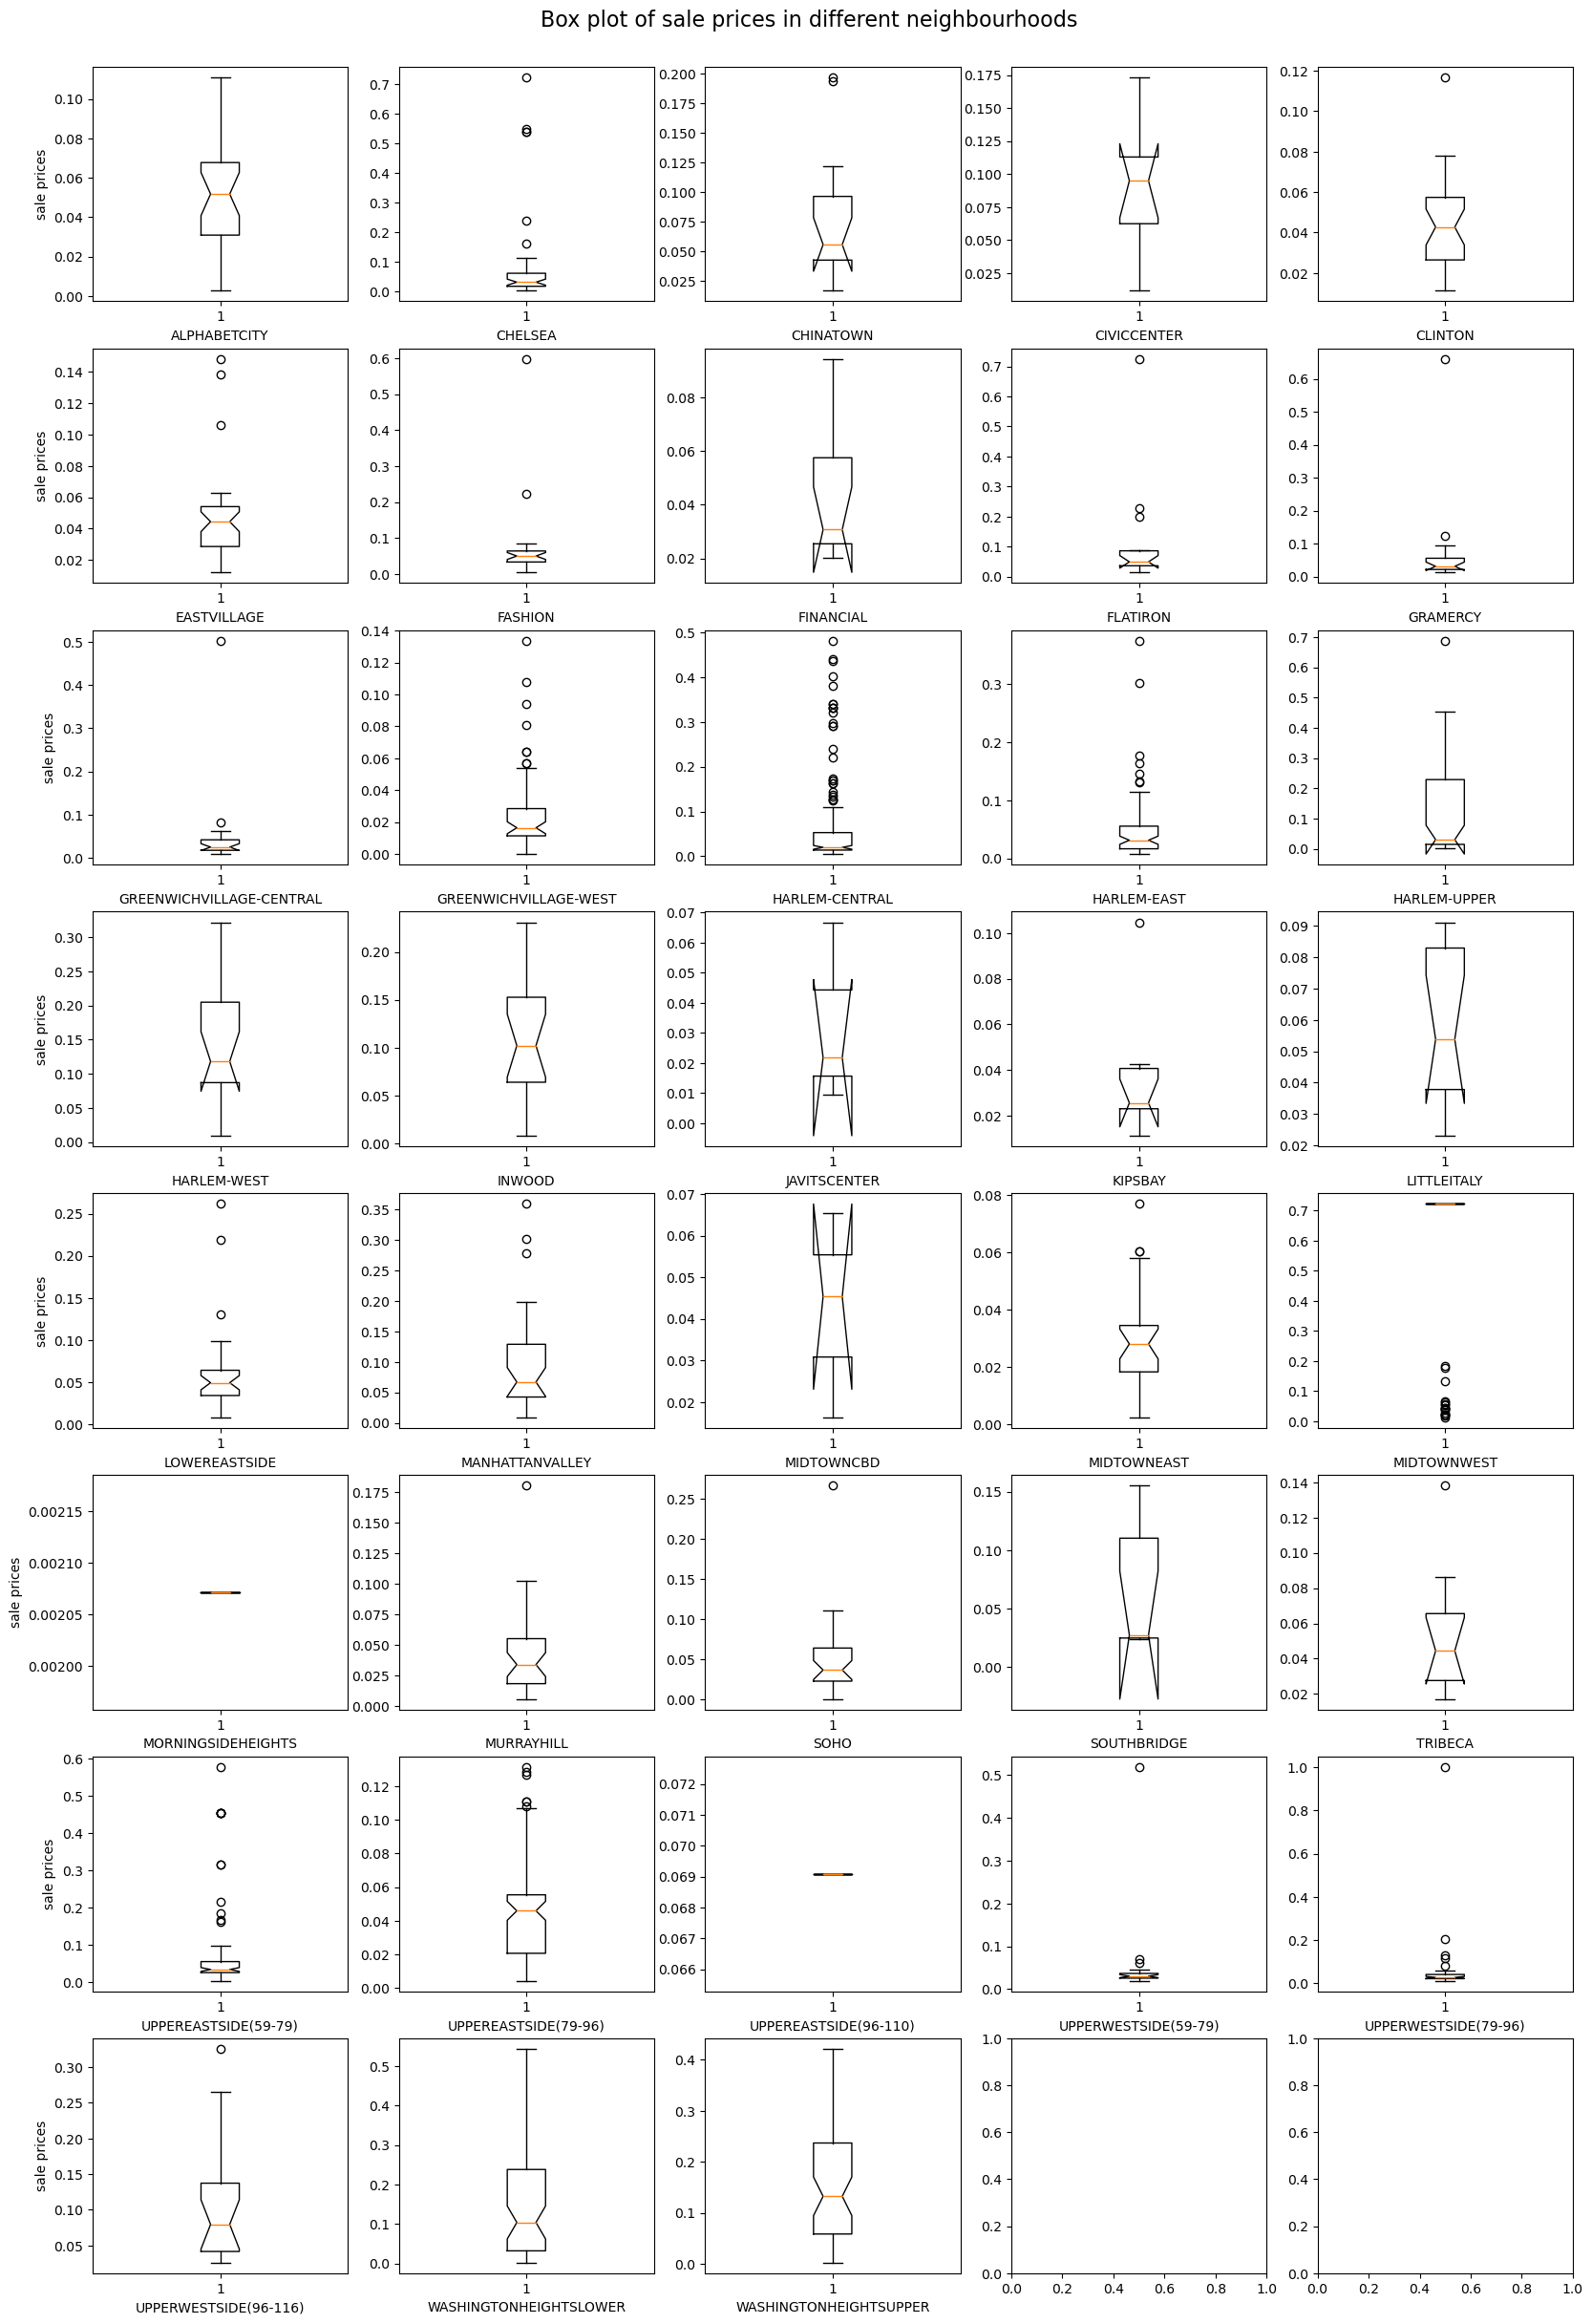

In [25]:
'''
First explore typical prices across different specific neighbourhoods.
'''

def price_neigh(df):
    unique_neigh = df["NEIGHBORHOOD"].unique()
    fig, axs = plt.subplots(8, 5,figsize=(20, 30), gridspec_kw={'width_ratios': [2, 2, 2, 2, 2],'height_ratios': [8, 8, 8, 8, 8, 8, 8, 8]})
    fig.suptitle('Box plot of sale prices in different neighbourhoods', fontsize=16, y=0.9)
    subr=0
    subc=0
    for un in range(0,len(unique_neigh)):
        dfN = df.loc[df["NEIGHBORHOOD"]==unique_neigh[un]]
        #df.loc[df["NEIGHBORHOOD"]==unique_neigh[un]].boxplot("lnprice","NEIGHBORHOOD", ax)
        axs[subr,subc].boxplot(dfN["GROSS SQUARE FEET"], "NEIGHBORHOOD")
        #axs[subr,subc].set_title("Box plot of sale prices in {}".format(unique_neigh[un]))
        if subc == 0:
            axs[subr,subc].set_ylabel("sale prices")
        axs[subr,subc].set_xlabel(unique_neigh[un])
        axs[subr,subc].set_aspect('auto')
        if subc==4:
            subc=0
            subr+=1
        else:
            subc+=1
    plt.show()
    
    #########-----WHOLE VIEW----###########
    #fig = plt.figure(figsize=(40,12))
    #ax = fig.gca()
    #df.boxplot("lnprice","NEIGHBORHOOD", ax)
    #ax.set_title("Box plot of sale prices in each neighborhood")
    #ax.set_ylabel("sale prices")
    #plt.xticks(rotation=30, ha="right", rotation_mode='anchor')
    #plt.show()
    
price_neigh(data)

Varying price quartiles and medians within different neighbourhoods suggest that the neighbourhood has an impact on overall sale price and should be considered by the model. 



### Visualise the prices over time

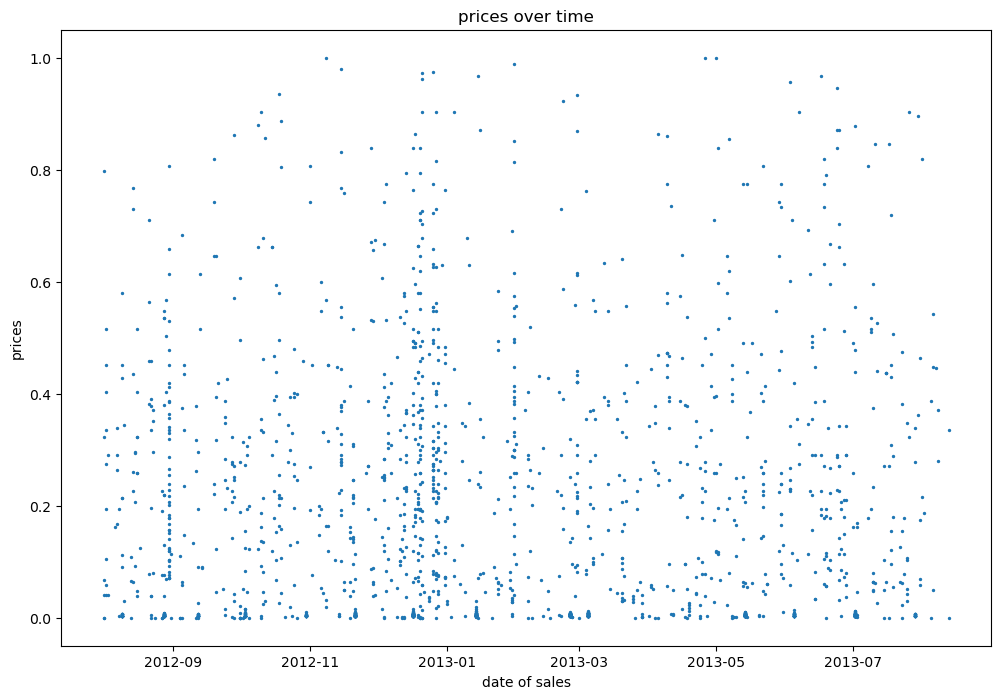

In [26]:
def price_time(df):
    fig, axs = plt.subplots(1,1, figsize=(12,8))
    """
    axs[0].scatter(df["SALE DATE"], df["lnprice"], s=2)
    axs[0].set_title("lnprices over time")
    axs[0].set_ylabel("lnprices")
    axs[0].set_xlabel("date of sales")
    axs[0].set_aspect("auto")
    """
    
    axs.scatter(df["SALE DATE"], df["SALE PRICE"], s=2)
    axs.set_title("prices over time")
    axs.set_ylabel("prices")
    axs.set_xlabel("date of sales")
    axs.set_aspect("auto")
    plt.show()
    
    
price_time(data)


Can see that prices generally lie between 0 and 0.2 over the years with some outliers from 0.2 and beyond (almost reaching 1). Issue with number of datapoints closer to end date - biasing the scatter plot results. Later prices are not congested between 0 and 0.2 and are positioned nearing higher prices than earlier dates.

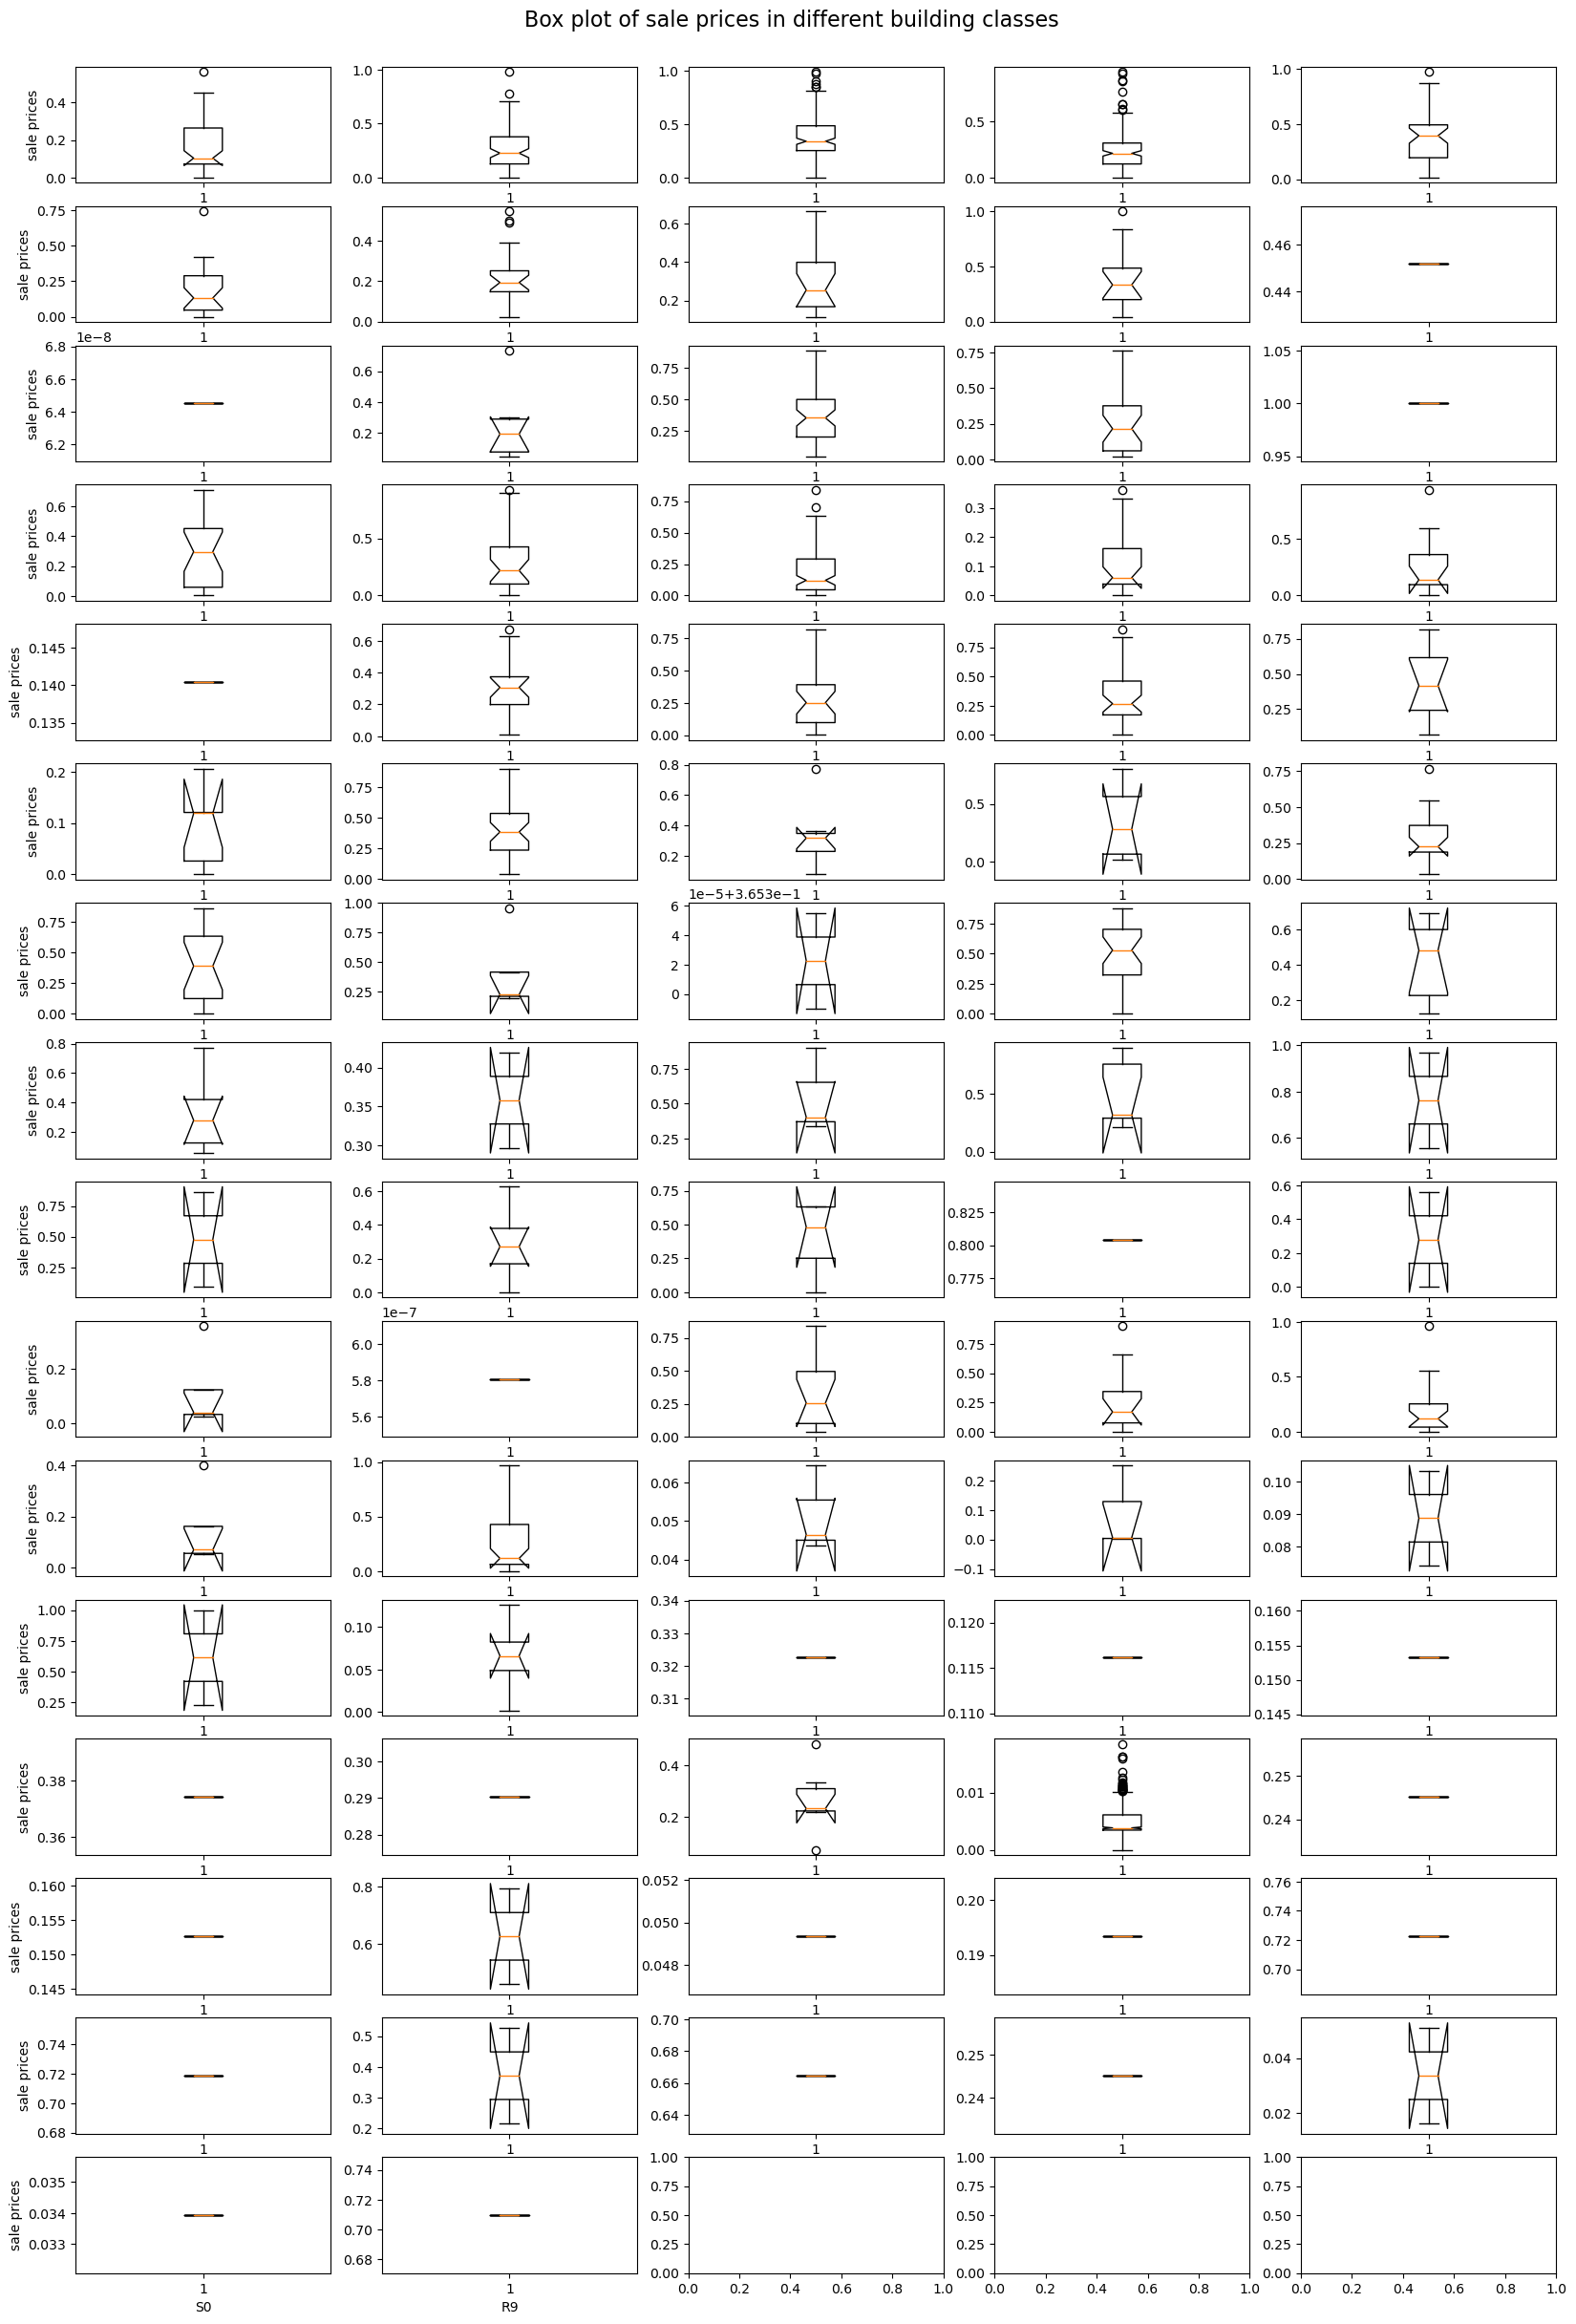

In [27]:
def p_bc(df):
    #data.boxplot("lnprice", "BUILDING CLASS AT TIME OF SALE")
    #plt.show()
    unique_bc = df["BUILDING CLASS AT TIME OF SALE"].unique()
    fig, axs = plt.subplots(16, 5,figsize=(20, 30), gridspec_kw={'width_ratios': [2, 2, 2, 2, 2],'height_ratios': [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]})
    fig.suptitle('Box plot of sale prices in different building classes', fontsize=16, y=0.9)
    subr=0
    subc=0
    for un in range(0,len(unique_bc)):
        dfN = df.loc[df["BUILDING CLASS AT TIME OF SALE"]==unique_bc[un]]
        axs[subr,subc].boxplot(dfN["SALE PRICE"], "BUILDING CLASS AT TIME OF SALE")
        if subc == 0:
            axs[subr,subc].set_ylabel("sale prices")
        axs[subr,subc].set_xlabel(unique_bc[un])
        axs[subr,subc].set_aspect('auto')
        if subc==4:
            subc=0
            subr+=1
        else:
            subc+=1
    plt.show()
p_bc(data)

Variability within different values of the building class suggest that the class of the property greatly determines the sale price.

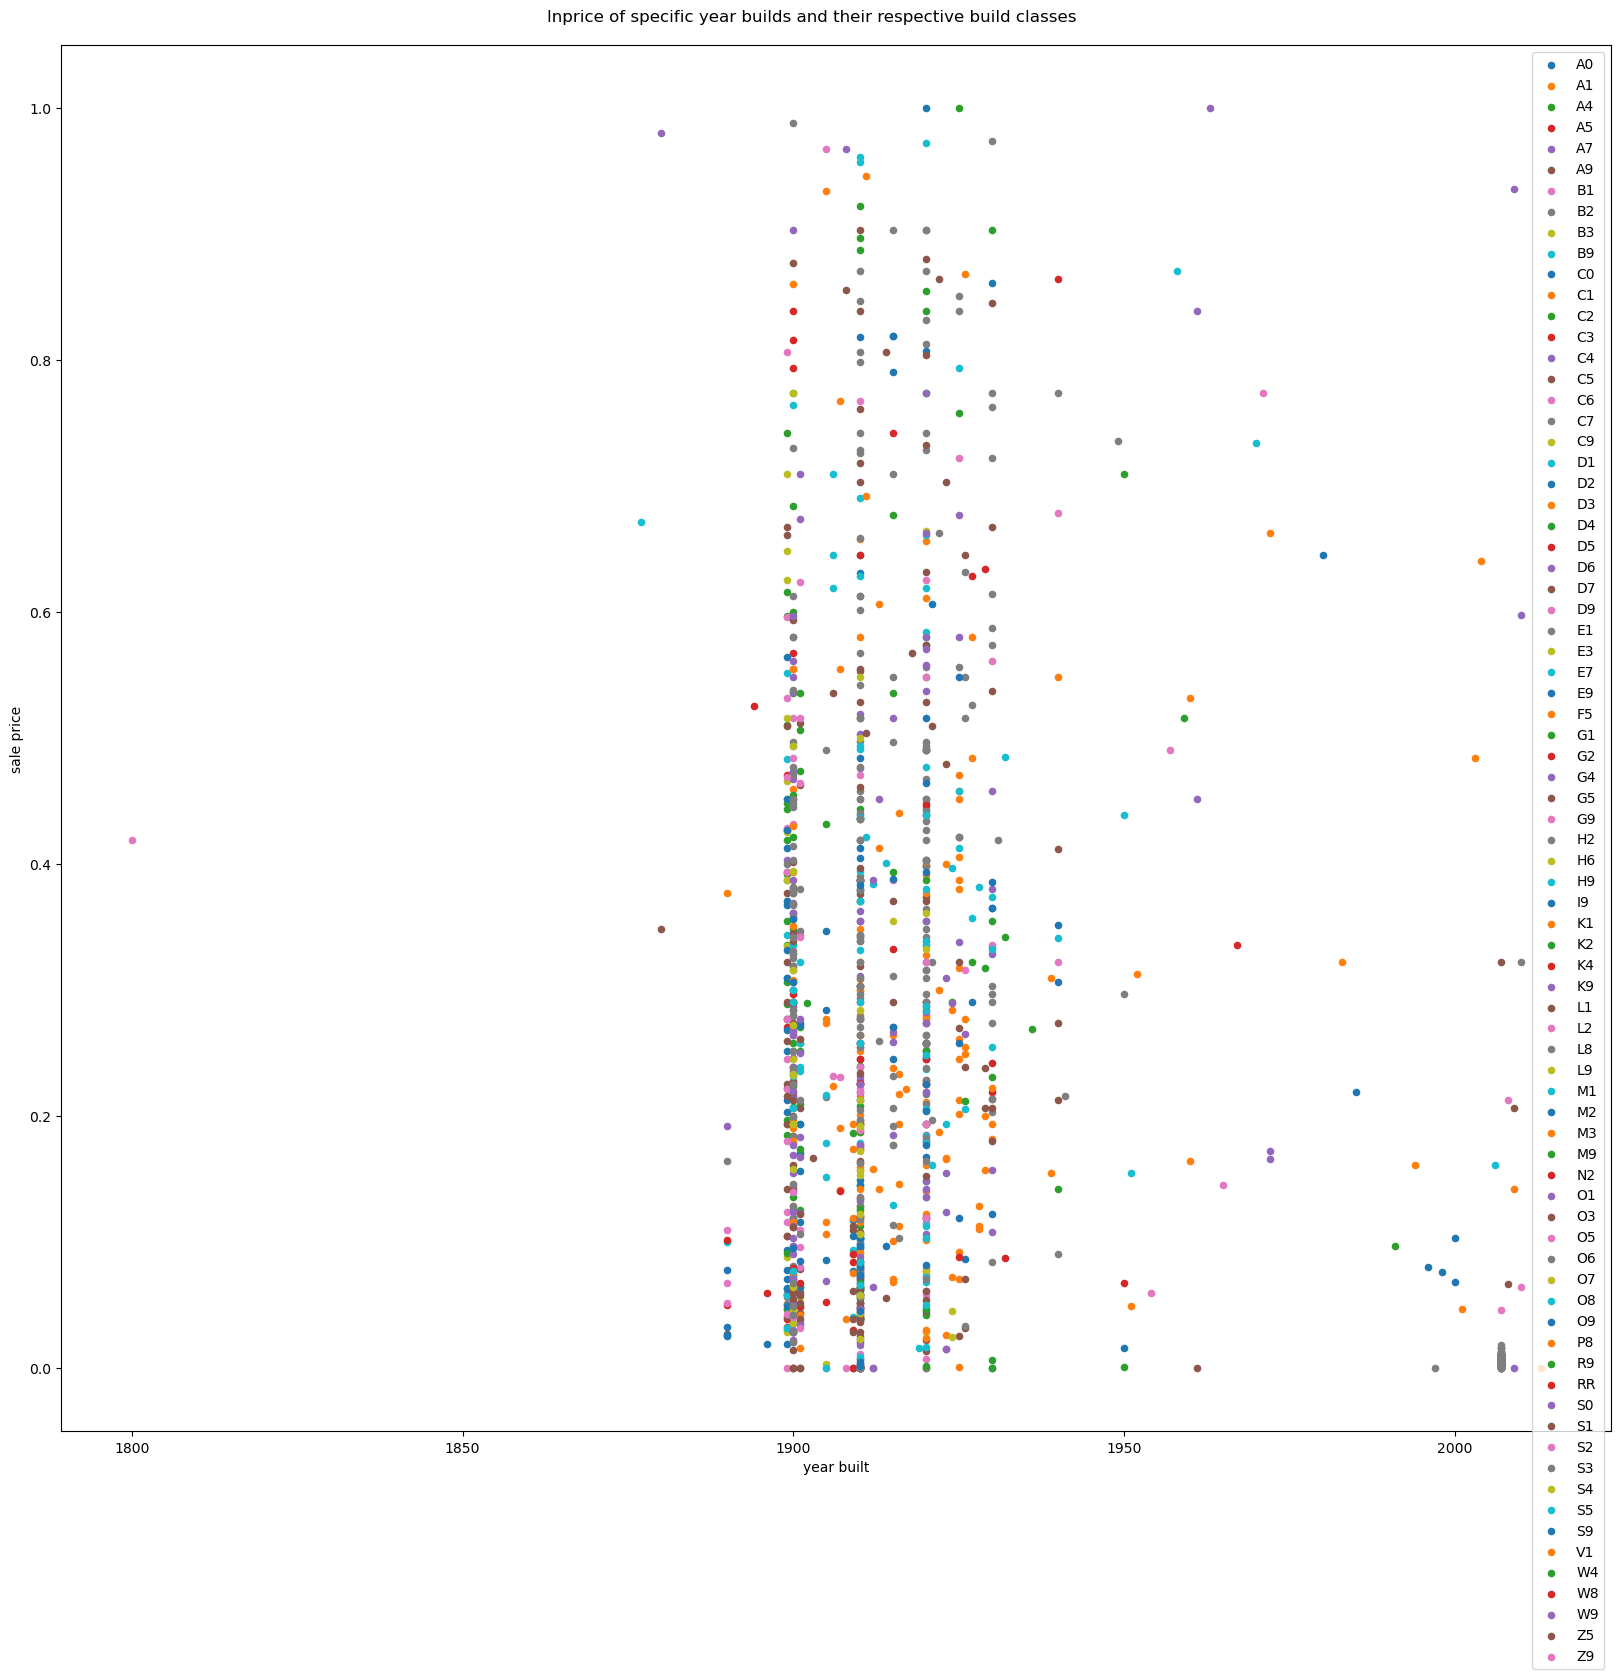

In [28]:
'''
Prices against year of build with colour coding of different building classes
'''
def prices_build(df):
    plt.figure(figsize=(20,18))
    groups = df.groupby('BUILDING CLASS AT TIME OF SALE')
    for name, gdf in groups:
        plt.scatter(gdf["YEAR BUILT"], gdf["SALE PRICE"], s=[5*4], label=name)
    plt.ylabel("sale price")
    plt.xlabel("year built")
    plt.suptitle("lnprice of specific year builds and their respective build classes", y=0.9)
    plt.legend()
    plt.show()
prices_build(data)

From this scatter plot we can conclude that the year build of the property factors greatly into the price. However, the number of data points for later years (>1960) is reduced. This may build some bias in the model predictions to favour the smaller set of data points for later years. Variability within the different classes for price output suggest that the class parameter could be considered in the final model.

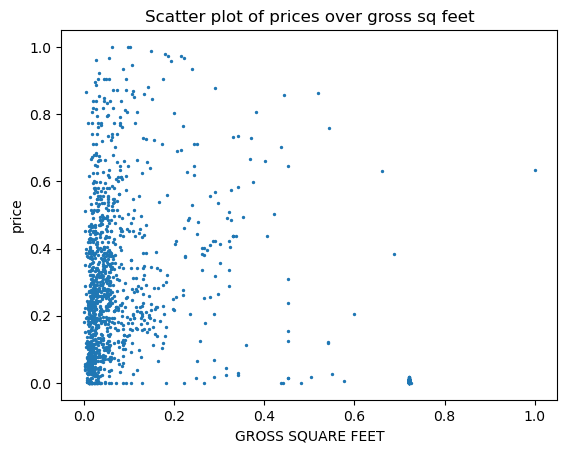

In [29]:
def price_grossSq(df):
    plt.title("Scatter plot of prices over gross sq feet")
    plt.scatter(df["GROSS SQUARE FEET"], df["SALE PRICE"], s=2)
    plt.ylabel("price")
    plt.xlabel("GROSS SQUARE FEET")
    plt.show()
    
    
price_grossSq(data)

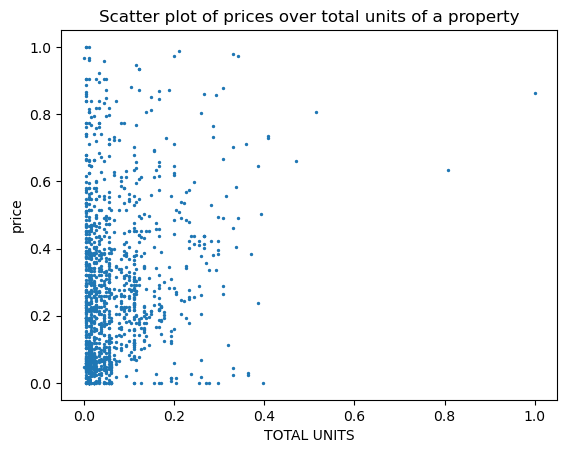

In [30]:
def price_tu(df):
    plt.title("Scatter plot of prices over total units of a property")
    plt.scatter(df["TOTAL UNITS"], df["SALE PRICE"], s=2)
    plt.ylabel("price")
    plt.xlabel("TOTAL UNITS")
    plt.show()
    
    
price_tu(data)

## Scatter plot matrix of numeric variables

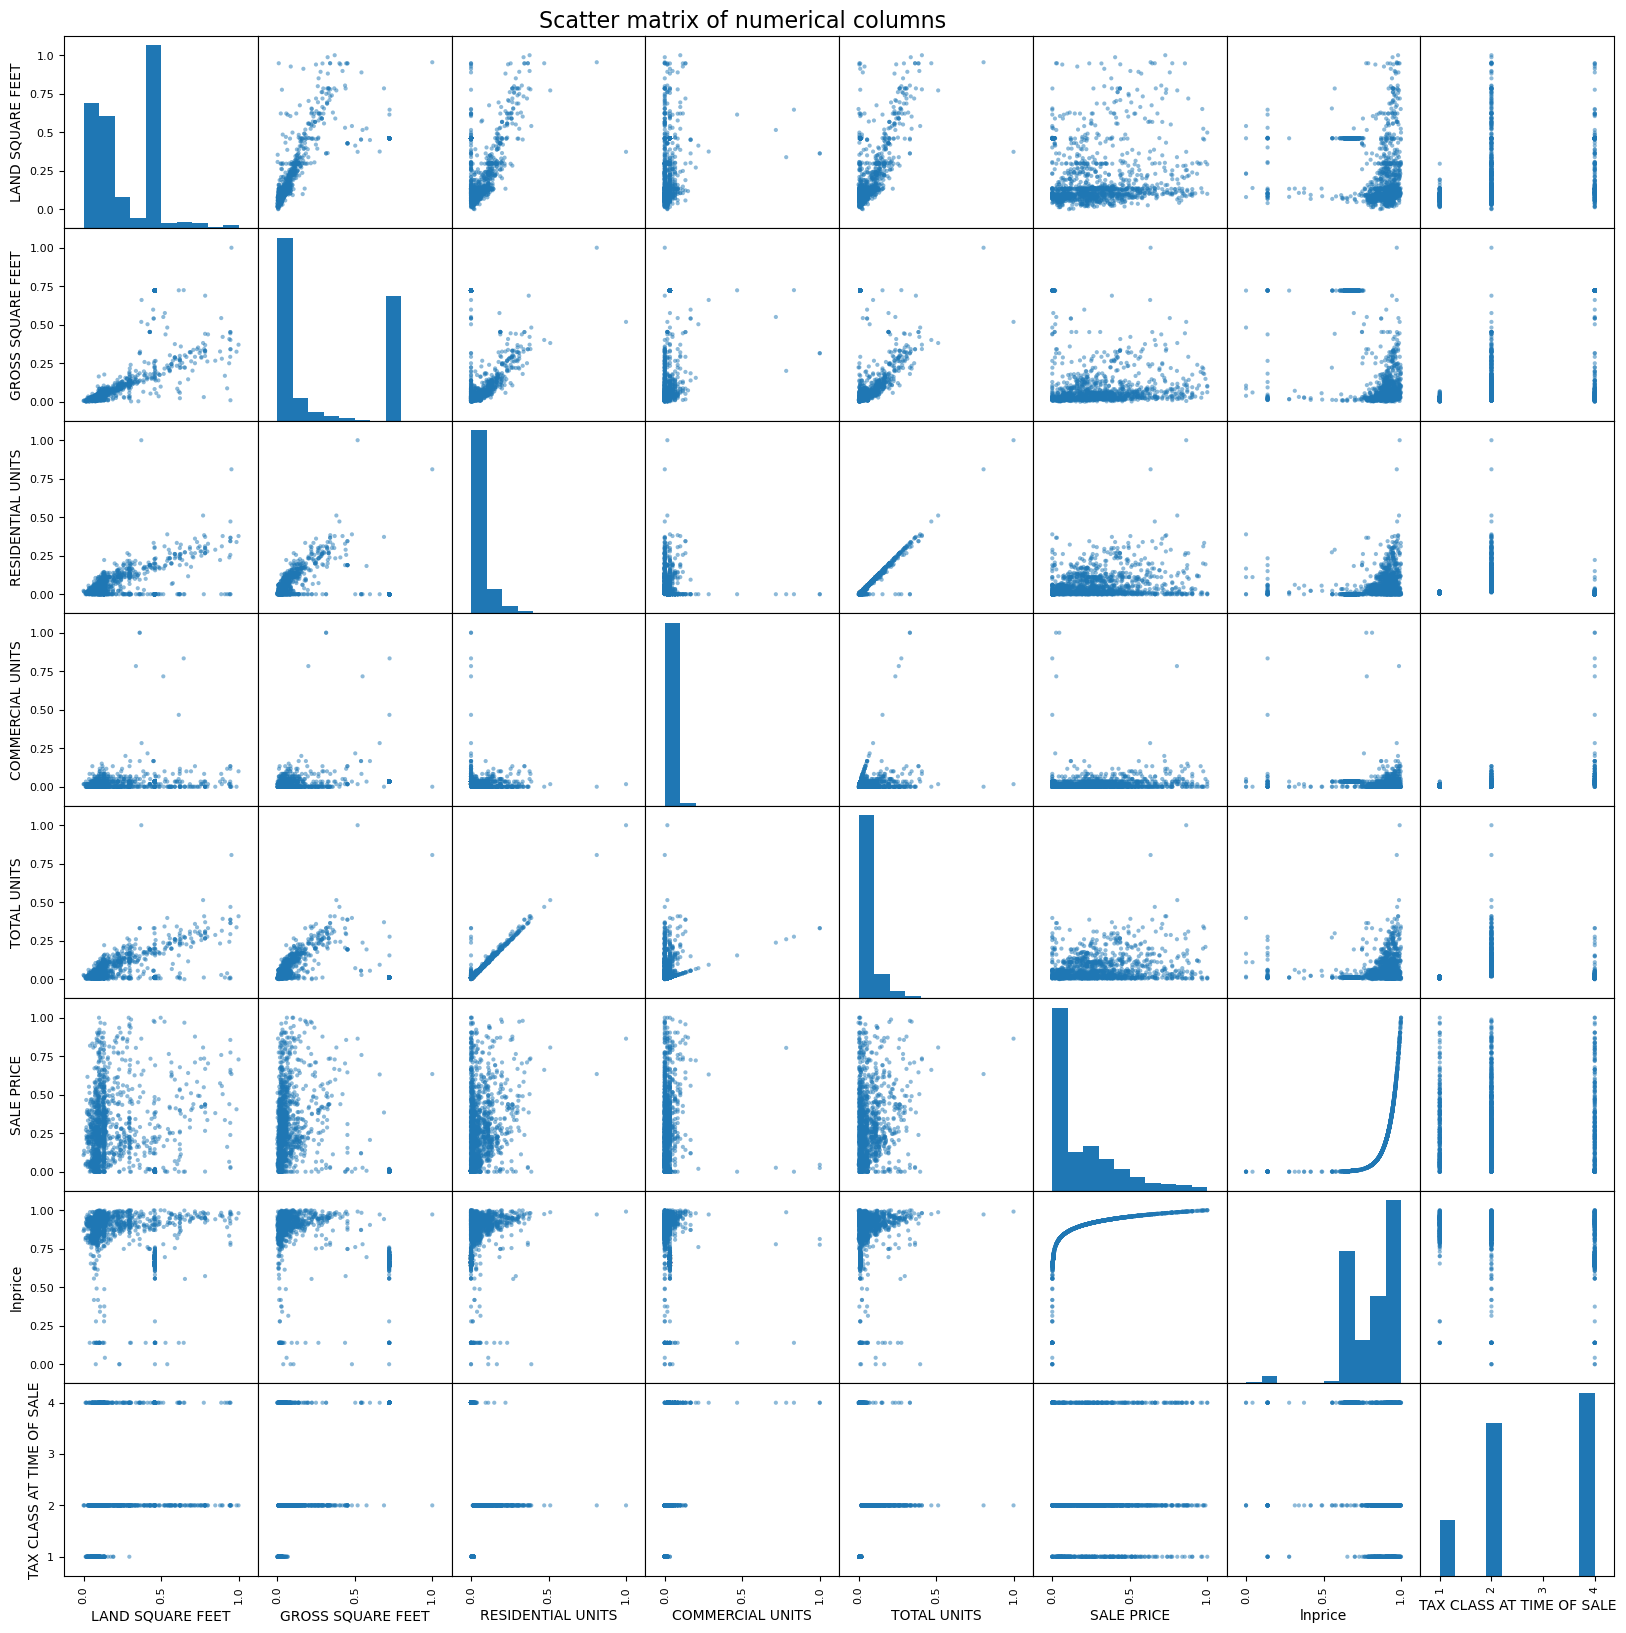

In [31]:
from pandas.plotting import scatter_matrix

def scatter_m(df, numericals):
    scatter_matrix(df[numericals], diagonal='hist', figsize=(20,20), range_padding=0.25)
    plt.title('Scatter matrix of numerical columns', fontsize=16, y=8, x=-3.5)
    plt.show()
    
numericals = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'SALE PRICE','lnprice', 'TAX CLASS AT TIME OF SALE']
scatter_m(data,numericals)

Collinearities:
- Near perfect positive correlation:
        - Residential units vs Total units
- Very strong positive correlation:
        - Land Square feet vs Gross square feet
        - Land Square feet vs Residential units
        - Land Square feet vs Total units
        - Gross square feet vs Residential units
        - Gross square feet vs Total units
- Weak positive correlation:
        - Commercial units vs Land Square feet
        - Sale price vs land square feet
        - Sale price vs gross square feet
        - Sale price vs Residential units
        - Sale price vs Commercial units
        - Sale price vs Total units
        
## Add negatives after sorting lnprice - NEED TO SORT OUT LNPRICE


## Correlation matrix 

In [32]:
corr = data[numericals].corr().style.background_gradient(cmap="spring")
corr
#styled = corr.style.background_gradient(cmap="spring").setPrecision(3)

,LAND SQUARE FEET,GROSS SQUARE FEET,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,SALE PRICE,lnprice,TAX CLASS AT TIME OF SALE
LAND SQUARE FEET,1.000000,0.810773,0.183010,0.224186,0.233390,-0.283439,-0.410696,0.605101
GROSS SQUARE FEET,0.810773,1.000000,-0.242360,0.214077,-0.193248,-0.546083,-0.630408,0.763110
RESIDENTIAL UNITS,0.183010,-0.242360,1.000000,-0.102009,0.974567,0.380932,0.314955,-0.373844
COMMERCIAL UNITS,0.224186,0.214077,-0.102009,1.000000,0.123425,-0.021922,-0.123973,0.313962
TOTAL UNITS,0.233390,-0.193248,0.974567,0.123425,1.000000,0.374647,0.285932,-0.301913
SALE PRICE,-0.283439,-0.546083,0.380932,-0.021922,0.374647,1.000000,0.714517,-0.395955
lnprice,-0.410696,-0.630408,0.314955,-0.123973,0.285932,0.714517,1.000000,-0.479265
TAX CLASS AT TIME OF SALE,0.605101,0.763110,-0.373844,0.313962,-0.301913,-0.395955,-0.479265,1.000000


Sale price has higher correl values against other columns and should be used primarily for model outcome rather than lnprice.

# Choosing good predictors

There are 2 ways of choosing predictors for the regression model. You can either use an estimator algorithm that fits the list of numerical columns to find which columns/features best predict the outcome. The number of features we want to select depends on us and in this scenario we want at least 3 so the model generalises well. The second method is to hand pick the predictors based on the correlation matrix and choosing the features with the highest correlation to sale price.

In [33]:
from sklearn import svm, feature_selection, linear_model

def first_ranked_predictors(df, numerical_features, outcome_feature):
    feature_cols = df[numerical_features].columns.values.tolist()

    XO = df[feature_cols]
    YO = df[outcome_feature]
    estimator = svm.SVR(kernel="linear")
    selector = feature_selection.RFE(estimator, n_features_to_select=3, step=3)
    selector = selector.fit(XO, YO)
    # From the ranking you can select your predictors with rank 1
    # Model 1; let us select the folowing features as predictors:
    select_features = np.array(feature_cols)[selector.ranking_ == 1].tolist()
    return select_features

select_features = first_ranked_predictors(data, ['COMMERCIAL UNITS', 'TOTAL UNITS', 'RESIDENTIAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET'], 'lnprice')
print(select_features)

['TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET']


# Data splitting and Model training
sklearn's functions can be used to split the dataset into a large train set and a small test set to compare the predictions with. Since, we want to predict the house sale price we need to use a linear regression model. After, the model is trained we can find the training and test accuracy.

In [34]:
from sklearn.model_selection import train_test_split

def data_split_train(df, predictor_features, outcome_feature):
    X = df[predictor_features]
    Y = df[outcome_feature]
    trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2) #, random_state=42)
    lm = linear_model.LinearRegression()
    lm.fit(trainX, trainY)
    # Inspect the calculated model equations
    print("Y-axis intercept {:6.4f}".format(lm.intercept_))
    print("Weight coefficients:")
    for feat, coef in zip(predictor_features, lm.coef_):
        print(" {:>20}: {:6.4f}".format(feat, coef))
    # The value of R^2
    print("R squared for the training data is {:4.3f}".format(lm.score(trainX, trainY)))
    print("Score against test data: {:4.3f}".format(lm.score(testX, testY)))
    return (lm, testX, testY)

sp_lm, sp_testX, sp_testY = data_split_train(data, ['LAND SQUARE FEET', 'TOTAL UNITS', 'GROSS SQUARE FEET'], 'lnprice')


Y-axis intercept 0.8647
Weight coefficients:
     LAND SQUARE FEET: 0.1548
          TOTAL UNITS: 0.1967
    GROSS SQUARE FEET: -0.3771
R squared for the training data is 0.403
Score against test data: 0.579


# Histogram of residuals
Residuals are the difference in the actual value and predicted value to find out how far off the model was.

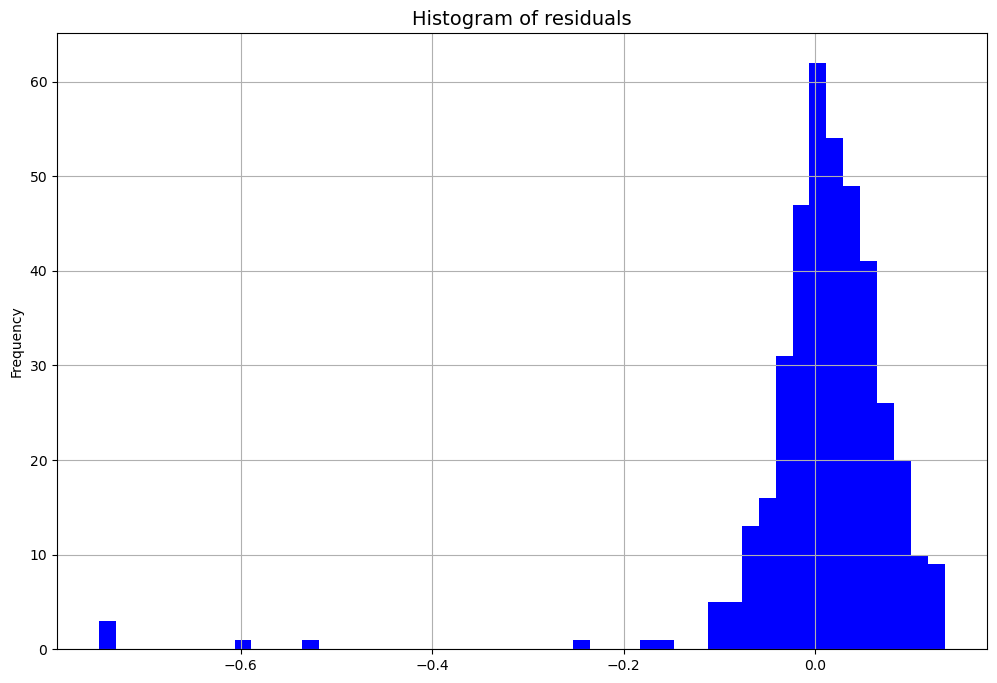

In [35]:
def hist_res(tModel, testX, testY):
    prediction = tModel.predict(testX)
    residuals = (testY - prediction)

    plt.figure(figsize=(12, 8))
    plt.title('Histogram of residuals', fontsize=14)
    plt.hist(residuals, color='blue', bins=50)
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()
    return
hist_res(sp_lm, sp_testX, sp_testY)

# Cross validation

In [36]:
from sklearn.model_selection import cross_val_score, KFold

#scores = cross_val_score(lm, X, Y, scoring="explained_variance" cv=5)
#print(scores)

def cv(df, tModel, pred_features, outcome):
    crossvalidation = KFold(10, shuffle=True)
    X = df[pred_features]
    Y = df[outcome]
    scores = cross_val_score(tModel, X, Y, cv=crossvalidation) # 5 K-folds is the default value
    print("Cross validation scores: {}".format(scores))
    print("Cross validation mean scores: {}".format(np.mean(scores)))
cv(data, sp_lm, ['TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET'], 'lnprice')

Cross validation scores: [0.52600759 0.65575576 0.31263733 0.26266987 0.59911338 0.42332079
 0.3696648  0.38199916 0.48189102 0.42994125]
Cross validation mean scores: 0.4443000945375452


# PART 2
With a focus on cleaning the Part 1 dataset differently

## Data Cleaning and Imputation

In [37]:
valid_sp_df = pd.DataFrame(og_data[og_data['SALE PRICE'].notna()])


#can use entire df with rows having np nan sale values to predict values in other columns -  bettter picture of gross/land sq feet since
#more data points for predicting those column values NOT SALE PRICE!
temp_sales = og_data[og_data['SALE PRICE'].isna()]#USE LATER

print("After removing rows with null sale price values")
print(valid_sp_df.shape)
print(valid_sp_df.isna().sum())

valid_lasqft_df = valid_sp_df[valid_sp_df['LAND SQUARE FEET'].notna()]

valid_grsqft_df = pd.DataFrame(valid_lasqft_df[valid_lasqft_df['GROSS SQUARE FEET'].notna()])

print("After removing rows with null land square feet values")
print(valid_lasqft_df.shape)
print(valid_lasqft_df.isna().sum())

print("After removing rows with null gross square feet values")
print(valid_grsqft_df.shape)
print(valid_grsqft_df.isna().sum())


After removing rows with null sale price values
(18928, 18)
NEIGHBORHOOD                         17
BUILDING CLASS CATEGORY            1145
TAX CLASS AT PRESENT                116
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT           116
ADDRESS                               0
ZIP CODE                              0
RESIDENTIAL UNITS                 11487
COMMERCIAL UNITS                  17287
TOTAL UNITS                        8807
LAND SQUARE FEET                  16616
GROSS SQUARE FEET                 16690
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             0
dtype: int64
After removing rows with null land square feet values
(2312, 18)
NEIGHBORHOOD                         0
BUILDING CLASS CATEGORY              0
TAX CLASS AT PRESENT                 0
BLOCK                    

In [38]:
valid_grsqft_df['RESIDENTIAL UNITS'] = valid_grsqft_df['RESIDENTIAL UNITS'].replace(to_replace = np.nan,  value = 0)
valid_grsqft_df['COMMERCIAL UNITS'] = valid_grsqft_df['COMMERCIAL UNITS'].replace(to_replace = np.nan,  value = 0)
valid_grsqft_df['TOTAL UNITS'] = valid_grsqft_df['TOTAL UNITS'].replace(to_replace = np.nan,  value = 0)

In [39]:
valid_grsqft_df.isna().sum()

NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [40]:
valid_grsqft_df.shape

(2232, 18)

In [41]:
valid_grsqft_df["lnprice"] = pd.DataFrame(np.log(valid_grsqft_df["SALE PRICE"]))
#valid_grsqft_df = normalise(valid_grsqft_df)

In [42]:
valid_grsqft_df.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,lnprice
count,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2.232000e+03,2232.000000
mean,1214.444444,48.492384,10025.397401,9.758961,2.083333,11.836470,5963.900538,54965.280466,1944.948477,2.829749,1.008254e+07,13.751327
std,533.654143,84.960317,28.316174,27.446736,6.322801,28.012158,8793.566208,74804.703895,45.781452,1.171395,4.246882e+07,2.853660
min,11.000000,1.000000,10001.000000,0.000000,0.000000,0.000000,469.000000,999.000000,1800.000000,1.000000,1.000000e+00,0.000000
25%,1009.000000,26.000000,10019.000000,0.000000,0.000000,2.000000,2018.000000,5662.250000,1910.000000,2.000000,8.832650e+04,11.388792
50%,1009.000000,37.000000,10019.000000,1.000000,2.000000,3.000000,4600.000000,17077.500000,1920.000000,2.000000,2.200000e+06,14.603968
75%,1661.250000,45.000000,10028.000000,10.000000,2.000000,11.000000,7532.000000,112850.000000,2007.000000,4.000000,6.256250e+06,15.649090
max,2246.000000,1502.000000,10463.000000,538.000000,150.000000,550.000000,213650.000000,940000.000000,2013.000000,4.000000,1.100000e+09,20.818576


## Key Difference between Part 1 model and the initial Part 2 model
The main difference is we also treat outliers for the lnprice which helps improve the model accuracy later.

In [43]:
valid_grsqft_df = identify_outlier(valid_grsqft_df, ["SALE PRICE", 'lnprice', "LAND SQUARE FEET", "GROSS SQUARE FEET"])
print("number of outliers identified:", valid_grsqft_df['outlier'].sum())
valid_grsqft_df = valid_grsqft_df[valid_grsqft_df.outlier == 0]
valid_grsqft_df.drop('outlier', axis = 1, inplace = True)


number of outliers identified: 294.0


In [44]:
valid_grsqft_df.shape

(1938, 19)

In [45]:
#valid_class_cat = valid_sp_df.dropna(subset=['NEIGHBORHOOD','TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS CATEGORY'])

In [46]:
normalised_df = normalise(valid_grsqft_df, ["COMMERCIAL UNITS","GROSS SQUARE FEET","LAND SQUARE FEET","RESIDENTIAL UNITS","SALE PRICE", "TOTAL UNITS", "lnprice"])
normalised_df.describe()


Normalising column: COMMERCIAL UNITS
Normalising column: GROSS SQUARE FEET
Normalising column: LAND SQUARE FEET
Normalising column: RESIDENTIAL UNITS
Normalising column: SALE PRICE
Normalising column: TOTAL UNITS
Normalising column: lnprice


,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,lnprice
count,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000
mean,1231.640351,46.449432,10025.655831,0.040626,0.024054,0.048347,0.280086,0.303839,1946.949948,2.796182,0.193171,0.736248
std,529.283937,67.061024,29.198990,0.073463,0.045673,0.072982,0.197151,0.321675,47.107212,1.176805,0.228573,0.183701
min,11.000000,1.000000,10001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1800.000000,1.000000,0.000000,0.000000
25%,1009.000000,29.000000,10019.000000,0.000000,0.000000,0.011050,0.099765,0.027572,1910.000000,2.000000,0.005375,0.539625
50%,1009.000000,37.000000,10019.000000,0.005556,0.033333,0.011050,0.221903,0.083890,1920.000000,2.000000,0.100312,0.797356
75%,1688.000000,44.000000,10029.000000,0.050000,0.033333,0.055249,0.460701,0.721731,2007.000000,4.000000,0.316121,0.898509
max,2246.000000,1502.000000,10463.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2010.000000,4.000000,1.000000,1.000000


In [47]:
corr = normalised_df[numericals].corr().style.background_gradient(cmap="spring")
corr

,LAND SQUARE FEET,GROSS SQUARE FEET,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,SALE PRICE,lnprice,TAX CLASS AT TIME OF SALE
LAND SQUARE FEET,1.000000,0.808868,0.182858,0.217741,0.228575,-0.290374,-0.541446,0.604629
GROSS SQUARE FEET,0.808868,1.000000,-0.245509,0.214750,-0.200888,-0.558309,-0.830540,0.763593
RESIDENTIAL UNITS,0.182858,-0.245509,1.000000,-0.108612,0.978483,0.390233,0.423112,-0.376100
COMMERCIAL UNITS,0.217741,0.214750,-0.108612,1.000000,0.098734,-0.014237,-0.109480,0.331072
TOTAL UNITS,0.228575,-0.200888,0.978483,0.098734,1.000000,0.387263,0.400445,-0.307477
SALE PRICE,-0.290374,-0.558309,0.390233,-0.014237,0.387263,1.000000,0.822089,-0.406543
lnprice,-0.541446,-0.830540,0.423112,-0.109480,0.400445,0.822089,1.000000,-0.638433
TAX CLASS AT TIME OF SALE,0.604629,0.763593,-0.376100,0.331072,-0.307477,-0.406543,-0.638433,1.000000


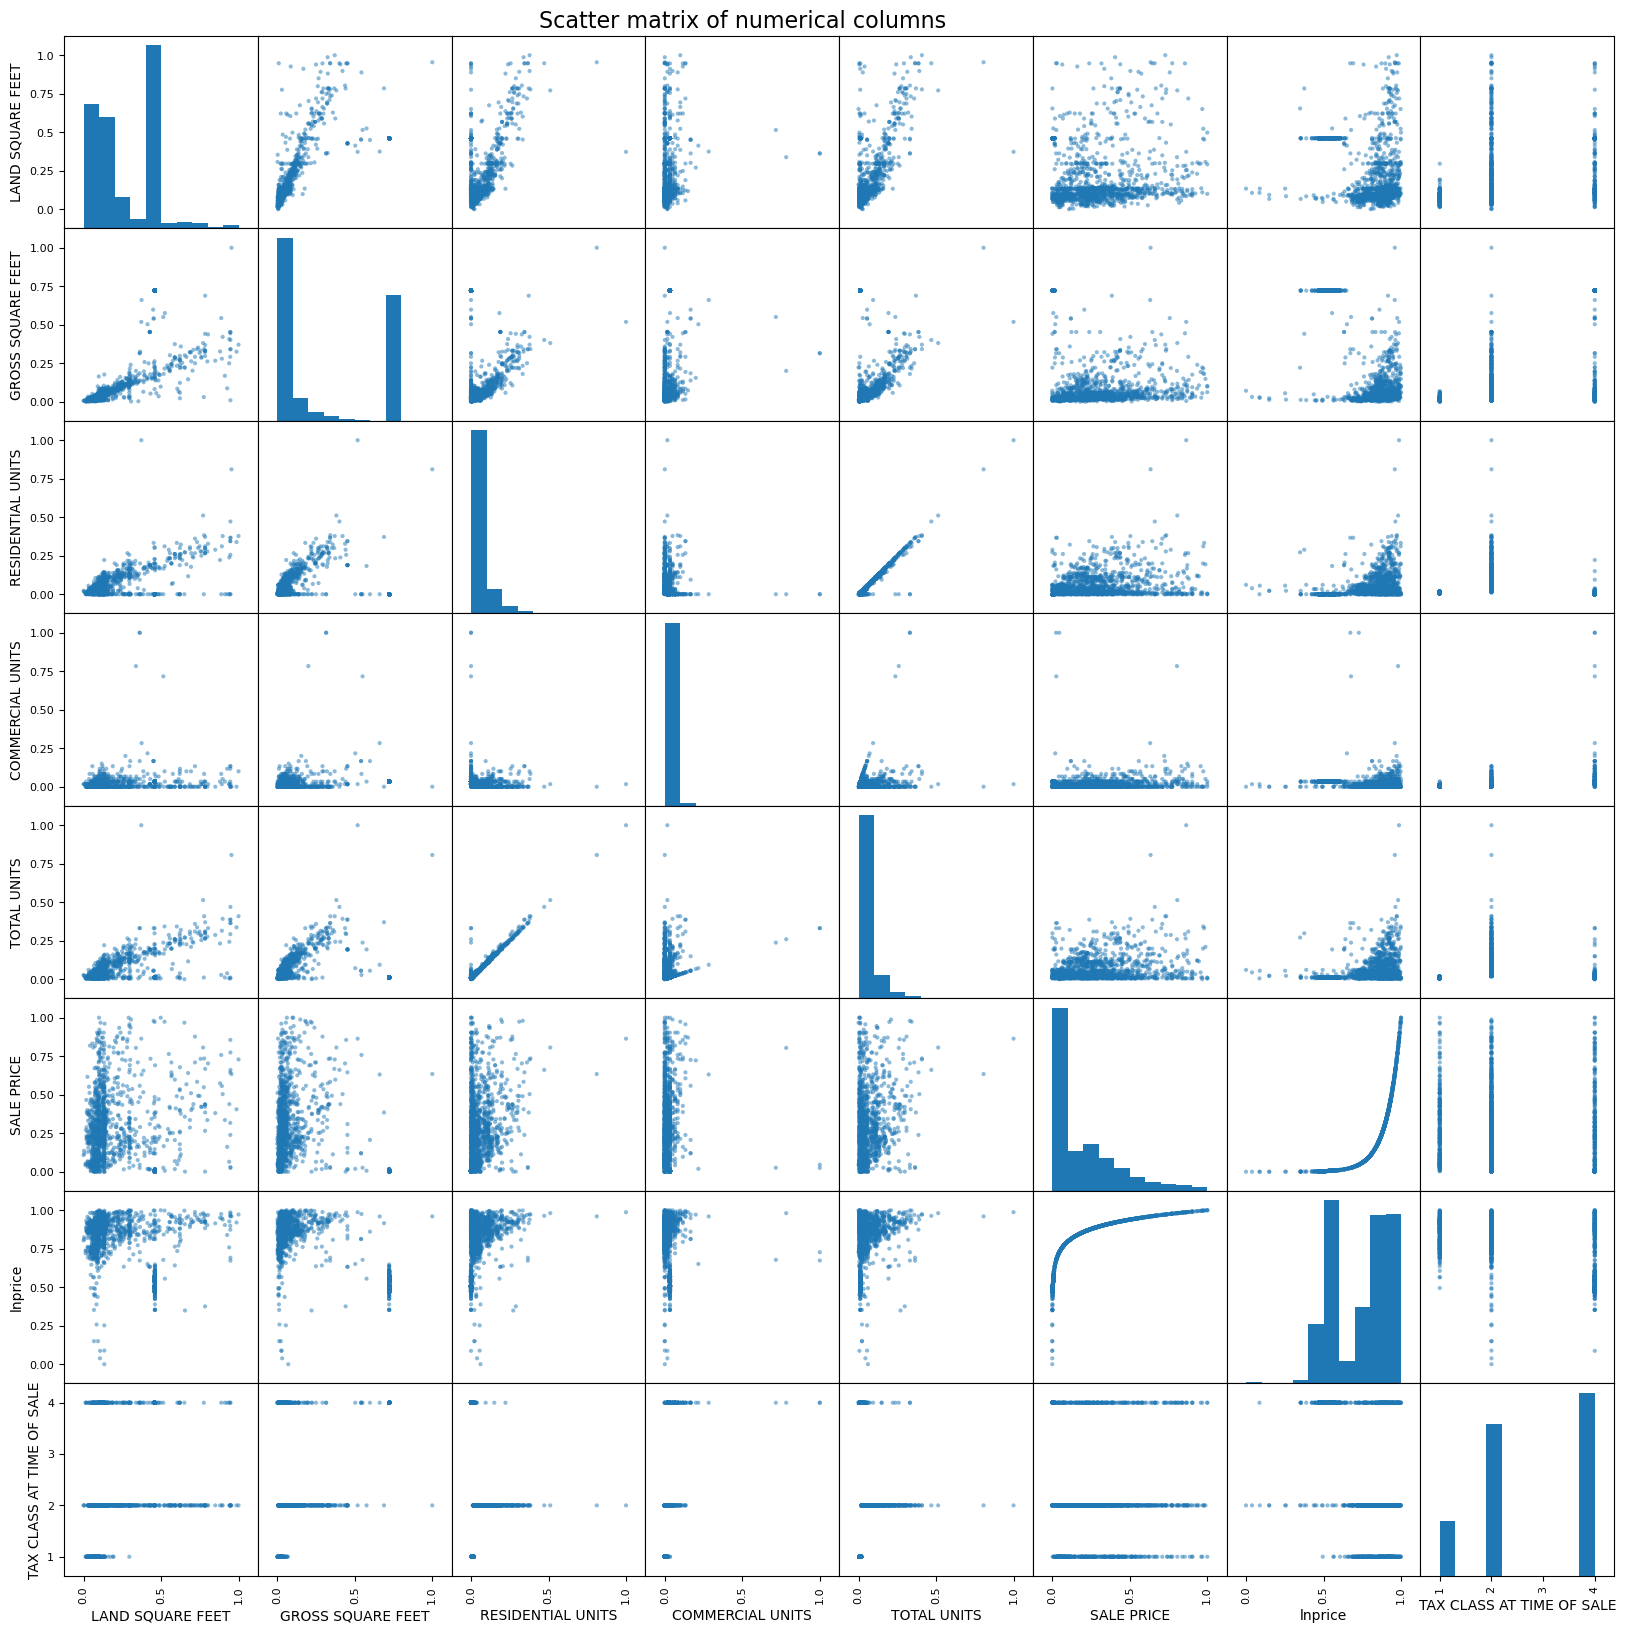

In [48]:
scatter_m(normalised_df,numericals)

In [49]:
cleanedDf_predictors = first_ranked_predictors(normalised_df, ['COMMERCIAL UNITS', 'TOTAL UNITS', 'RESIDENTIAL UNITS', 'TAX CLASS AT TIME OF SALE', 'LAND SQUARE FEET', 'GROSS SQUARE FEET'], 'lnprice')
print(cleanedDf_predictors)


['TOTAL UNITS', 'RESIDENTIAL UNITS', 'GROSS SQUARE FEET']


In [50]:
lm, testX, testY = data_split_train(normalised_df, ['TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET'], 'lnprice')


Y-axis intercept 0.8336
Weight coefficients:
          TOTAL UNITS: 0.4030
     LAND SQUARE FEET: 0.1636
    GROSS SQUARE FEET: -0.5364
R squared for the training data is 0.738
Score against test data: 0.817


In [51]:
cv(normalised_df, lm, ['TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET'], 'lnprice')

Cross validation scores: [0.78199119 0.73953971 0.80368317 0.82687786 0.85008347 0.69545041
 0.74542296 0.56656636 0.7754855  0.75340892]
Cross validation mean scores: 0.7538509550591357


# PART 2 upgrades
Now that we have a linear regression model with better accuracy than before let's try other learning methods which create models with better performance

In [52]:
from sklearn.ensemble import RandomForestRegressor

def rf_train(df, predictor_features, outcome_feature):
    X = df[predictor_features]
    Y = df[outcome_feature]
    trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2) #, random_state=42)
    rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 18).fit(trainX, trainY)
    print("R squared for the training data is {:4.3f}".format(rf.score(trainX, trainY)))
    print("Score against test data: {:4.3f}".format(rf.score(testX, testY)))
    return rf


In [53]:
rf_model = rf_train(normalised_df, ['TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET'], 'lnprice')

R squared for the training data is 0.832
Score against test data: 0.754


In [54]:
cv(normalised_df, rf_model, ['TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET'], 'lnprice')

Cross validation scores: [0.79279177 0.68718788 0.82452427 0.68772548 0.80420287 0.79470867
 0.85956275 0.74422986 0.83593123 0.8840376 ]
Cross validation mean scores: 0.7914902390769212


In [55]:
gross_rf = rf_train(normalised_df, ['TOTAL UNITS', 'lnprice'], 'GROSS SQUARE FEET')

R squared for the training data is 0.976
Score against test data: 0.978


In [56]:
cv(normalised_df, gross_rf, ['RESIDENTIAL UNITS', 'lnprice', 'LAND SQUARE FEET'], 'GROSS SQUARE FEET')

Cross validation scores: [0.97652917 0.95367304 0.98841336 0.99374791 0.99442446 0.98757457
 0.99057621 0.99008279 0.98480091 0.9928549 ]
Cross validation mean scores: 0.985267732676213


In [57]:
land_rf = rf_train(normalised_df, ['TOTAL UNITS', 'lnprice', 'GROSS SQUARE FEET'], 'LAND SQUARE FEET')

R squared for the training data is 0.939
Score against test data: 0.815


In [58]:
cv(normalised_df, land_rf, ['TOTAL UNITS', 'lnprice', 'GROSS SQUARE FEET'], 'LAND SQUARE FEET')

Cross validation scores: [0.9281717  0.95468372 0.81816083 0.87878804 0.92110307 0.86173632
 0.84751708 0.92043448 0.87015867 0.86743643]
Cross validation mean scores: 0.88681903495719


In [59]:
valid_sp_df.isna().sum()

NEIGHBORHOOD                         17
BUILDING CLASS CATEGORY            1145
TAX CLASS AT PRESENT                116
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT           116
ADDRESS                               0
ZIP CODE                              0
RESIDENTIAL UNITS                 11487
COMMERCIAL UNITS                  17287
TOTAL UNITS                        8807
LAND SQUARE FEET                  16616
GROSS SQUARE FEET                 16690
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             0
dtype: int64

In [60]:
valid_sp_df['lnprice'] = np.log(valid_sp_df['SALE PRICE'])

no_outliers = identify_outlier(valid_sp_df, ["SALE PRICE", 'lnprice'])
print("number of outliers identified:", no_outliers['outlier'].sum())
no_outliers = no_outliers[no_outliers.outlier == 0]
no_outliers.drop('outlier', axis = 1, inplace = True)

missing_gross = pd.DataFrame(no_outliers[no_outliers['GROSS SQUARE FEET'].isna()])

missing_gross['RESIDENTIAL UNITS'] = missing_gross['RESIDENTIAL UNITS'].replace(to_replace = np.nan,  value = 0)
missing_gross['COMMERCIAL UNITS'] = missing_gross['COMMERCIAL UNITS'].replace(to_replace = np.nan,  value = 0)
missing_gross['TOTAL UNITS'] = missing_gross['TOTAL UNITS'].replace(to_replace = np.nan,  value = 0)
#missing_gross['lnprice'] = np.log(missing_gross['SALE PRICE'])

"""
missing_gross = identify_outlier(missing_gross, ["SALE PRICE", 'lnprice'])
print("number of outliers identified:", missing_gross['outlier'].sum())
missing_gross = missing_gross[missing_gross.outlier == 0]
missing_gross.drop('outlier', axis = 1, inplace = True)
"""

missing_gross = normalise(missing_gross, ["COMMERCIAL UNITS","GROSS SQUARE FEET","LAND SQUARE FEET","RESIDENTIAL UNITS","SALE PRICE", "TOTAL UNITS", "lnprice"])

missing_X = missing_gross[['TOTAL UNITS', 'lnprice']]
missing_X

number of outliers identified: 3517.0
Normalising column: COMMERCIAL UNITS


/var/folders/pm/hch49fg94wx7ycdhtqxym5880000gn/T/ipykernel_23366/4112294350.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_outliers.drop('outlier', axis = 1, inplace = True)


Normalising column: GROSS SQUARE FEET
Normalising column: LAND SQUARE FEET
Normalising column: RESIDENTIAL UNITS
Normalising column: SALE PRICE
Normalising column: TOTAL UNITS
Normalising column: lnprice


,TOTAL UNITS,lnprice
0,0.000000,0.884756
1,0.000000,0.816574
2,0.000000,0.714432
3,0.000000,0.773211
4,0.000000,0.815853
...,...,...
27367,0.111111,0.575386
27368,0.111111,0.545848
27387,0.000000,0.612005
27389,0.000000,0.304135


In [61]:
pred_gross = gross_rf.predict(missing_X)
missing_gross['GROSS SQUARE FEET'] = pred_gross


In [62]:
missing_gross.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,lnprice
count,14284.000000,14284.000000,14284.000000,14284.000000,14284.000000,14284.000000,42.000000,14284.000000,14284.000000,14284.000000,14284.000000,14284.000000
mean,1120.473887,699.994679,10031.176561,0.043460,0.007841,0.046696,0.159877,0.167852,1689.605923,2.059717,0.272964,0.644221
std,506.907608,864.676312,38.977630,0.054796,0.088204,0.055411,0.186205,0.119905,666.133332,0.343783,0.212554,0.172875
min,11.000000,1.000000,10001.000000,0.000000,0.000000,0.000000,0.000000,0.019885,0.000000,1.000000,0.000000,0.000000
25%,803.000000,26.000000,10013.000000,0.000000,0.000000,0.000000,0.065445,0.063284,1914.000000,2.000000,0.121580,0.529551
50%,1171.000000,410.500000,10022.000000,0.000000,0.000000,0.000000,0.105968,0.134951,1939.000000,2.000000,0.199910,0.636138
75%,1451.000000,1153.000000,10028.000000,0.111111,0.000000,0.111111,0.160937,0.318991,1965.000000,2.000000,0.364964,0.769845
max,2250.000000,9046.000000,10282.000000,1.000000,1.000000,1.000000,1.000000,0.455927,2013.000000,4.000000,1.000000,1.000000


In [63]:
valid_gross = pd.DataFrame(no_outliers[no_outliers['GROSS SQUARE FEET'].notna()])

valid_gross['RESIDENTIAL UNITS'] = valid_gross['RESIDENTIAL UNITS'].replace(to_replace = np.nan,  value = 0)
valid_gross['COMMERCIAL UNITS'] = valid_gross['COMMERCIAL UNITS'].replace(to_replace = np.nan,  value = 0)
valid_gross['TOTAL UNITS'] = valid_gross['TOTAL UNITS'].replace(to_replace = np.nan,  value = 0)
#valid_gross['lnprice'] = np.log(valid_gross['SALE PRICE'])

valid_gross = normalise(valid_gross, ["COMMERCIAL UNITS","GROSS SQUARE FEET","LAND SQUARE FEET","RESIDENTIAL UNITS","SALE PRICE", "TOTAL UNITS", "lnprice"])

valid_gross.isna().sum()

Normalising column: COMMERCIAL UNITS
Normalising column: GROSS SQUARE FEET
Normalising column: LAND SQUARE FEET
Normalising column: RESIDENTIAL UNITS
Normalising column: SALE PRICE
Normalising column: TOTAL UNITS
Normalising column: lnprice


NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
lnprice                           0
dtype: int64

In [64]:
valid_gross.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,lnprice
count,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000
mean,1304.400177,48.272405,10025.637090,0.015562,0.024460,0.019957,0.112575,0.179751,1959.566105,3.004437,0.257811,0.452544
std,506.813239,69.362598,32.172804,0.044988,0.050169,0.044967,0.082457,0.158944,48.930777,1.178922,0.320504,0.368357
min,64.000000,1.000000,10001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1890.000000,1.000000,0.000000,0.000000
25%,1009.000000,37.000000,10019.000000,0.000000,0.000000,0.005988,0.034928,0.011592,1910.000000,2.000000,0.008408,0.109578
50%,1009.000000,37.000000,10019.000000,0.000000,0.033333,0.005988,0.164137,0.249583,2007.000000,4.000000,0.053641,0.367405
75%,1829.000000,38.500000,10029.000000,0.014970,0.033333,0.017964,0.164137,0.333342,2007.000000,4.000000,0.461501,0.823023
max,2238.000000,1103.000000,10463.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2013.000000,4.000000,1.000000,1.000000


In [65]:
treated_gross = pd.concat([missing_gross,valid_gross])
treated_gross.isna().sum()

NEIGHBORHOOD                         15
BUILDING CLASS CATEGORY             242
TAX CLASS AT PRESENT                 96
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT            96
ADDRESS                               0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  14242
GROSS SQUARE FEET                     0
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             0
lnprice                               0
dtype: int64

In [66]:
treated_gross.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,lnprice
count,15411.000000,15411.000000,15411.000000,15411.000000,15411.000000,15411.000000,1169.000000,15411.000000,15411.000000,15411.000000,15411.000000,15411.000000
mean,1133.924340,652.334501,10030.771462,0.041420,0.009056,0.044740,0.114275,0.168722,1709.347998,2.128804,0.271856,0.630203
std,509.141222,849.781303,38.546847,0.054622,0.086103,0.055155,0.088597,0.123213,645.287956,0.521151,0.222253,0.200263
min,11.000000,1.000000,10001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,838.000000,27.000000,10014.000000,0.000000,0.000000,0.000000,0.035579,0.063031,1913.000000,2.000000,0.114586,0.517173
50%,1170.000000,69.000000,10022.000000,0.000000,0.000000,0.000000,0.164137,0.141677,1939.000000,2.000000,0.197113,0.633061
75%,1459.000000,1133.000000,10028.000000,0.111111,0.000000,0.111111,0.164137,0.329547,1971.000000,2.000000,0.370559,0.773272
max,2250.000000,9046.000000,10463.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2013.000000,4.000000,1.000000,1.000000


In [67]:
missing_land = pd.DataFrame(treated_gross[treated_gross['LAND SQUARE FEET'].isna()])

In [68]:
missing_land.isna().sum()

NEIGHBORHOOD                         15
BUILDING CLASS CATEGORY             242
TAX CLASS AT PRESENT                 96
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT            96
ADDRESS                               0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  14242
GROSS SQUARE FEET                     0
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             0
lnprice                               0
dtype: int64

In [69]:
missing_land_X = missing_land[['TOTAL UNITS', 'lnprice', 'GROSS SQUARE FEET']]
pred_land = land_rf.predict(missing_land_X)
missing_land['LAND SQUARE FEET'] = pred_land

In [70]:
missing_land.isna().sum()

NEIGHBORHOOD                       15
BUILDING CLASS CATEGORY           242
TAX CLASS AT PRESENT               96
BLOCK                               0
LOT                                 0
BUILDING CLASS AT PRESENT          96
ADDRESS                             0
ZIP CODE                            0
RESIDENTIAL UNITS                   0
COMMERCIAL UNITS                    0
TOTAL UNITS                         0
LAND SQUARE FEET                    0
GROSS SQUARE FEET                   0
YEAR BUILT                          0
TAX CLASS AT TIME OF SALE           0
BUILDING CLASS AT TIME OF SALE      0
SALE PRICE                          0
SALE DATE                           0
lnprice                             0
dtype: int64

In [71]:
missing_land.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,lnprice
count,14242.000000,14242.000000,14242.000000,14242.000000,14242.000000,14242.000000,14242.000000,14242.000000,14242.000000,14242.000000,14242.000000,14242.000000
mean,1118.779174,701.854374,10031.176801,0.043518,0.007794,0.046755,0.290903,0.167896,1694.454501,2.053995,0.272854,0.644195
std,505.807144,865.246901,39.023579,0.054238,0.087941,0.054856,0.148431,0.119829,660.905786,0.327719,0.212366,0.172779
min,11.000000,1.000000,10001.000000,0.000000,0.000000,0.000000,0.105463,0.019885,0.000000,1.000000,0.000000,0.000000
25%,802.000000,26.000000,10013.000000,0.000000,0.000000,0.000000,0.142588,0.063284,1915.000000,2.000000,0.121580,0.529551
50%,1171.000000,489.000000,10022.000000,0.000000,0.000000,0.000000,0.296461,0.134951,1939.000000,2.000000,0.199910,0.636138
75%,1450.000000,1154.000000,10028.000000,0.111111,0.000000,0.111111,0.455516,0.318315,1965.000000,2.000000,0.364790,0.769738
max,2250.000000,9046.000000,10282.000000,0.111111,1.000000,0.111111,0.512627,0.348822,2013.000000,4.000000,1.000000,1.000000


In [72]:
valid_land = treated_gross[treated_gross['LAND SQUARE FEET'].notna()]

In [73]:
valid_land.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,lnprice
count,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000
mean,1318.438837,49.030796,10025.833191,0.015859,0.024437,0.020190,0.114275,0.178789,1890.796407,3.040205,0.259700,0.459739
std,513.647692,71.845075,31.777863,0.052814,0.057116,0.052842,0.088597,0.158467,363.823992,1.172279,0.318857,0.365621
min,64.000000,1.000000,10001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1009.000000,37.000000,10019.000000,0.000000,0.000000,0.005988,0.035579,0.011972,1910.000000,2.000000,0.008700,0.112597
50%,1009.000000,37.000000,10019.000000,0.000000,0.033333,0.005988,0.164137,0.209183,1941.000000,4.000000,0.083814,0.453254
75%,1843.000000,40.000000,10029.000000,0.011976,0.033333,0.014970,0.164137,0.333342,2007.000000,4.000000,0.461501,0.823023
max,2238.000000,1103.000000,10463.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2013.000000,4.000000,1.000000,1.000000


In [74]:
treated_land = pd.concat([missing_land,valid_land])
treated_land.isna().sum()

NEIGHBORHOOD                       15
BUILDING CLASS CATEGORY           242
TAX CLASS AT PRESENT               96
BLOCK                               0
LOT                                 0
BUILDING CLASS AT PRESENT          96
ADDRESS                             0
ZIP CODE                            0
RESIDENTIAL UNITS                   0
COMMERCIAL UNITS                    0
TOTAL UNITS                         0
LAND SQUARE FEET                    0
GROSS SQUARE FEET                   0
YEAR BUILT                          0
TAX CLASS AT TIME OF SALE           0
BUILDING CLASS AT TIME OF SALE      0
SALE PRICE                          0
SALE DATE                           0
lnprice                             0
dtype: int64

In [75]:
#treated_data = identify_outlier(treated_land, ["LAND SQUARE FEET", "GROSS SQUARE FEET", "SALE PRICE", "lnprice"])
#print("number of outliers identified:", treated_data['outlier'].sum())
#treated_data = treated_data[treated_data.outlier == 0]
#treated_data.drop('outlier', axis = 1, inplace = True)


In [76]:
treated_data = treated_land
treated_data.shape

(15411, 19)

In [77]:
treated_data.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,lnprice
count,15411.000000,15411.000000,15411.000000,15411.000000,15411.000000,15411.000000,15411.000000,15411.000000,15411.000000,15411.000000,15411.000000,15411.000000
mean,1133.924340,652.334501,10030.771462,0.041420,0.009056,0.044740,0.277505,0.168722,1709.347998,2.128804,0.271856,0.630203
std,509.141222,849.781303,38.546847,0.054622,0.086103,0.055155,0.152126,0.123213,645.287956,0.521151,0.222253,0.200263
min,11.000000,1.000000,10001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,838.000000,27.000000,10014.000000,0.000000,0.000000,0.000000,0.134975,0.063031,1913.000000,2.000000,0.114586,0.517173
50%,1170.000000,69.000000,10022.000000,0.000000,0.000000,0.000000,0.231318,0.141677,1939.000000,2.000000,0.197113,0.633061
75%,1459.000000,1133.000000,10028.000000,0.111111,0.000000,0.111111,0.455050,0.329547,1971.000000,2.000000,0.370559,0.773272
max,2250.000000,9046.000000,10463.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2013.000000,4.000000,1.000000,1.000000


In [78]:
treated_corr = treated_data[numericals].corr().style.background_gradient(cmap="spring")
treated_corr

,LAND SQUARE FEET,GROSS SQUARE FEET,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,SALE PRICE,lnprice,TAX CLASS AT TIME OF SALE
LAND SQUARE FEET,1.000000,0.886735,-0.248258,-0.053852,-0.270286,-0.576797,-0.489099,-0.139573
GROSS SQUARE FEET,0.886735,1.000000,-0.331050,-0.030428,-0.349219,-0.631413,-0.646415,0.141571
RESIDENTIAL UNITS,-0.248258,-0.331050,1.000000,-0.077439,0.945345,0.270009,0.316334,-0.186272
COMMERCIAL UNITS,-0.053852,-0.030428,-0.077439,1.000000,0.095637,0.030704,-0.004361,0.290400
TOTAL UNITS,-0.270286,-0.349219,0.945345,0.095637,1.000000,0.258934,0.284246,0.015588
SALE PRICE,-0.576797,-0.631413,0.270009,0.030704,0.258934,1.000000,0.882349,-0.168059
lnprice,-0.489099,-0.646415,0.316334,-0.004361,0.284246,0.882349,1.000000,-0.398185
TAX CLASS AT TIME OF SALE,-0.139573,0.141571,-0.186272,0.290400,0.015588,-0.168059,-0.398185,1.000000


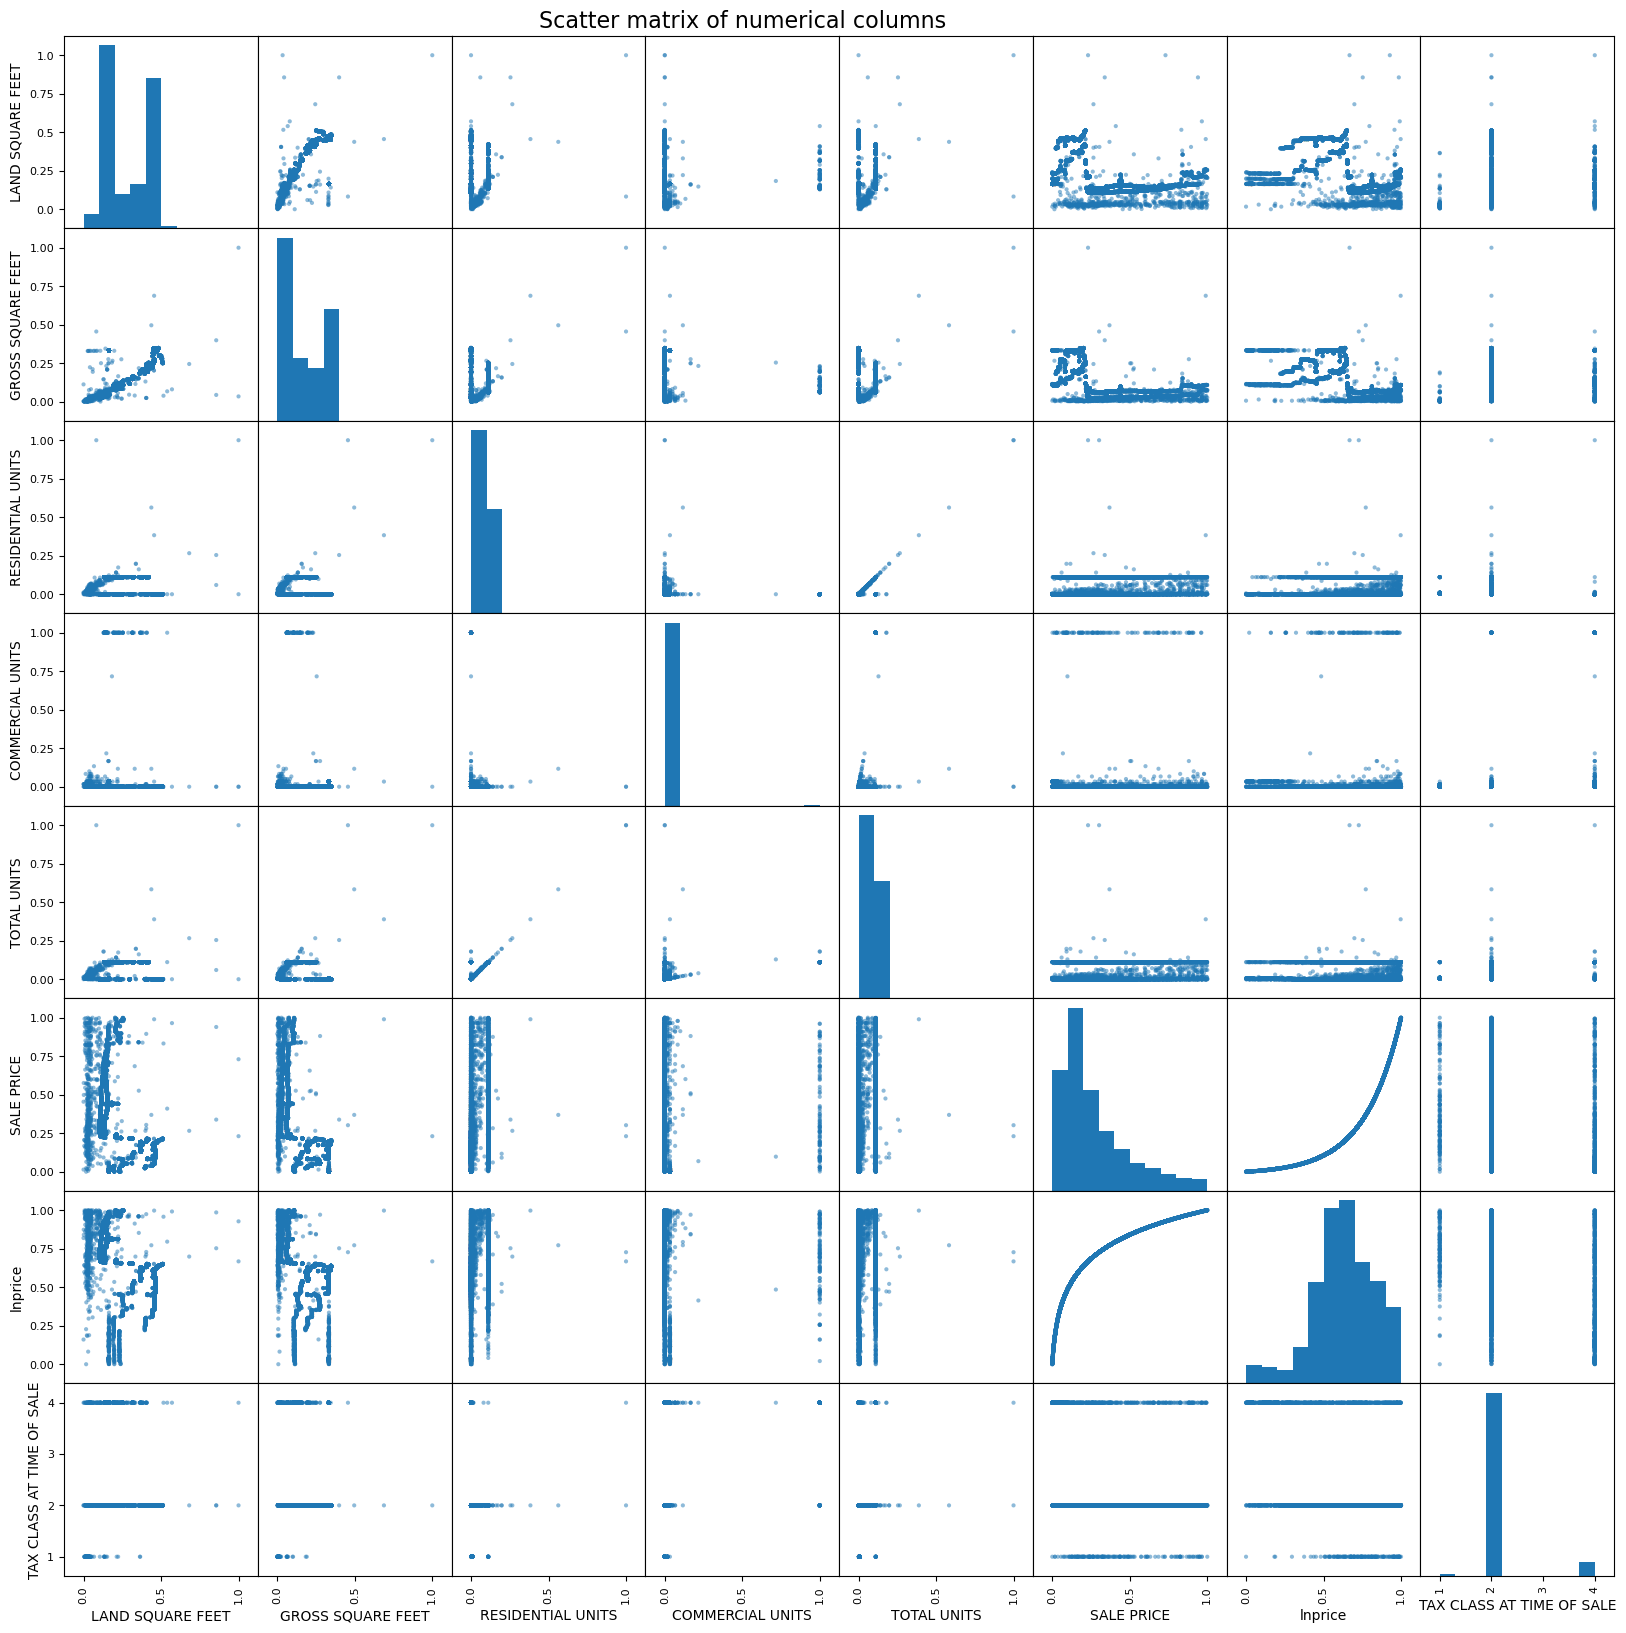

In [79]:
scatter_m(treated_data,numericals)

In [80]:
treated_rf = rf_train(treated_data, ['LAND SQUARE FEET', 'TOTAL UNITS', 'GROSS SQUARE FEET'], 'lnprice')



R squared for the training data is 0.870
Score against test data: 0.867


In [81]:
cv(treated_data, treated_rf, ['LAND SQUARE FEET', 'TOTAL UNITS', 'GROSS SQUARE FEET'], 'lnprice')

Cross validation scores: [0.84875953 0.86748947 0.85403131 0.87235271 0.8633916  0.84397264
 0.86962223 0.86203358 0.87040925 0.86590023]
Cross validation mean scores: 0.8617962541635261


# K-Means Clustering

Text(0.5, 1.0, 'Regression line slope is -0.6438635885576941 and y-intercept is 0.8088786306385191')

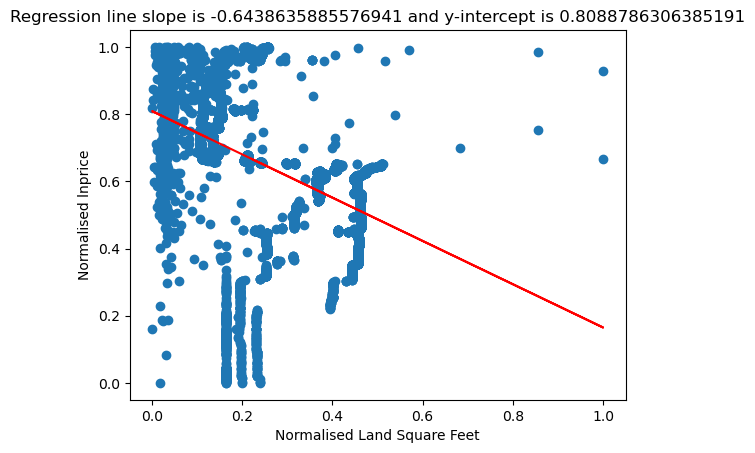

In [82]:
#regression_line = np.polyfit(treated_data['LAND SQUARE FEET'], treated_data['SALE PRICE'], 1)

from scipy.stats import linregress

# Regression line
slope, intercept, r_value, p_value, std_err = linregress(treated_data['LAND SQUARE FEET'], treated_data['lnprice'])

def regression_y(x):
    return slope * x + intercept

plt.scatter(treated_data['LAND SQUARE FEET'], treated_data['lnprice'])
plt.plot(treated_data['LAND SQUARE FEET'], regression_y(treated_data['LAND SQUARE FEET']), 'r')
plt.xlabel('Normalised Land Square Feet')
plt.ylabel('Normalised lnprice')
plt.title("Regression line slope is {} and y-intercept is {}".format(slope, intercept))

In [83]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=4)
km.fit(normalised_df[numericals])

print('J-score = ', km.inertia_)
## include the labels into the data
print(km.labels_)

J-score =  138.7719608747662
[0 2 2 ... 3 3 3]


In [84]:
labels = km.labels_
md = pd.Series(labels)
normalised_df['clust'] = md

R squared for the training data is 0.899
Score against test data: 0.906
Cross validation scores: [0.89564049 0.89584193 0.90080475 0.90322329 0.89384137 0.89708995
 0.90050026 0.89545916 0.89901852 0.89390384]
Cross validation mean scores: 0.8975323550027902


'\ndef elbow(data):\n    sse = {}\n    for k in range(2, 20, 2):\n        kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)\n        print(k, kmeans.inertia_)\n        print(kmeans)\n        sse[k] = kmeans.inertia_  \n    plt.figure()\n    plt.plot(list(sse.keys()), list(sse.values()), linewidth=4)\n    plt.title("j score elbow method")\n    plt.xlabel("Number of clusters")\n    plt.ylabel("Cost")\n    plt.show()\nelbow(normalised_df[[\'TOTAL UNITS\', \'RESIDENTIAL UNITS\', \'LAND SQUARE FEET\', \'GROSS SQUARE FEET\', \'lnprice\']])\n# k=4 clusters best cluster number as it shows the greatest proportionally reductive results from 4 clusters to 6\n'

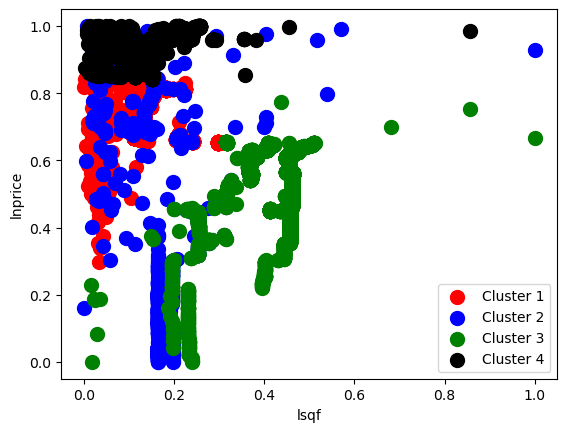

In [85]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import completeness_score
from sklearn.metrics import r2_score

treat_copy = treated_data[numericals].copy()

X = treated_data[['LAND SQUARE FEET', 'GROSS SQUARE FEET']]

Y = treated_data['lnprice']

trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2)

###fit the whole df so we get true testY vals aswell
model_whole = KMeans(n_clusters=4).fit_predict(treated_data[numericals])



#model = KMeans(n_clusters=6).fit(trainX,trainY)
#newY = model.predict(testX,testY)




#print("training score objective met",model.score(trainX, trainY))
#print("test score objective met",model.score(testX, testY))

#completeness metric of a cluster labeling given a ground truth
#completeness if all the data points that are members of a given class are elements of the same cluster.

#print("completeness_score ",completeness_score(testY,model.predict(testX)))

#print("r2_score ",r2_score(testY, model.predict(testX)))#how are we meant to know the true cluster values for testY

#print('J Score (cost) = ', model_whole.inertia_)
treated_data['clust'] = model_whole

#labels = model_whole.labels_
#md = pd.Series(labels)
#treated_data['clust'] = md

#print(display(treated_data))
#print(display(grouped_c = treated_data.groupby("clust")).head(50))

#print(treated_data.isna().sum())


#print(display(treated_data[['TOTAL UNITS', 'RESIDENTIAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE', 'lnprice','clust']].head(10)))

#centroids = model_whole.cluster_centers_
#print ('centroids', centroids)

#plt.hist(treated_data['clust'])
#plt.title('Histogram of Clusters')
#plt.xlabel('Cluster')
#plt.ylabel('Frequency')
#plt.show()

#cl_means = treated_data.groupby('clust').mean()
   
#print(display(cl_means['lnprice']))
#print(display(cl_means['LAND SQUARE FEET']))
#print(display(cl_means['GROSS SQUARE FEET']))

df1 = treated_data[treated_data.clust==0]
df2 = treated_data[treated_data.clust==1]
df3 = treated_data[treated_data.clust==2]
df4 = treated_data[treated_data.clust==3]
#df5 = treated_data[treated_data.clust==4]


plt.scatter(df1['LAND SQUARE FEET'], df1['lnprice'], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(df2['LAND SQUARE FEET'], df2['lnprice'], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(df3['LAND SQUARE FEET'], df3['lnprice'], s = 100,  c = 'green', label = 'Cluster 3')
plt.scatter(df4['LAND SQUARE FEET'], df4['lnprice'], s = 100,  c = 'black', label = 'Cluster 4')
plt.xlabel("lsqf")
plt.ylabel("lnprice")
plt.legend()

final_rf = rf_train(treated_data, ['LAND SQUARE FEET', 'TOTAL UNITS', 'GROSS SQUARE FEET', 'clust'], 'lnprice')
cv(treated_data, final_rf, ['LAND SQUARE FEET', 'TOTAL UNITS', 'GROSS SQUARE FEET', 'clust'], 'lnprice')

#plt.scatter(df5['LAND SQUARE FEET'], df5['lnprice'], s = 100,  c = 'purple', label = 'Cluster 5')

#pca_data = PCA(n_components=2).fit(normalised_df[numericals])
#pca_2d = pca_data.transform(normalised_df[numericals])
#plt.scatter(pca_2d[:,0], pca_2d[:,1], c=labels)
#plt.title('house clusters')
#plt.show()

"""
def elbow(data):
    sse = {}
    for k in range(2, 20, 2):
        kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
        print(k, kmeans.inertia_)
        print(kmeans)
        sse[k] = kmeans.inertia_  
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()), linewidth=4)
    plt.title("j score elbow method")
    plt.xlabel("Number of clusters")
    plt.ylabel("Cost")
    plt.show()
elbow(normalised_df[['TOTAL UNITS', 'RESIDENTIAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'lnprice']])
# k=4 clusters best cluster number as it shows the greatest proportionally reductive results from 4 clusters to 6
"""

              0         1  clust
0     -0.214774  0.428802      0
1     -0.183822  0.290347      3
2     -0.146262  0.136588      3
3     -0.166963  0.220401      3
4     -0.183420  0.288398      3
...         ...       ...    ...
15406 -0.153743  0.155383      3
15407 -0.261034  0.661789      0
15408  1.677979  1.093800      2
15409  1.716454  0.901183      2
15410  1.775523  0.581203      2

[15411 rows x 3 columns]


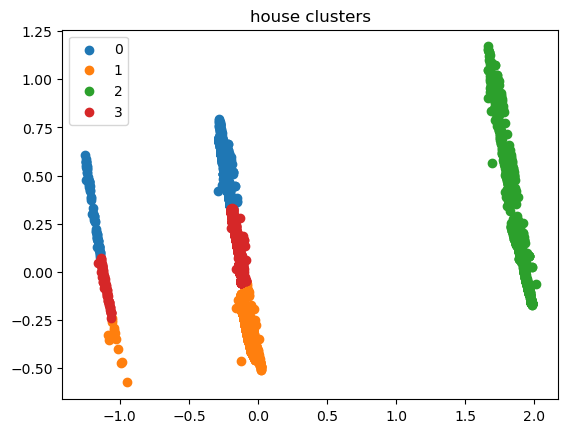

silhouette coeff 0.66580563075435

with just clust2
R squared for the training data is 0.901
Score against test data: 0.896
Cross validation scores: [0.89469471 0.90487946 0.8962223  0.90406925 0.88589398 0.89668745
 0.90610756 0.89938598 0.88376678 0.88928675]
Cross validation mean scores: 0.89609941987153

with both clust1 and clust 2...
R squared for the training data is 0.901
Score against test data: 0.887
Cross validation scores: [0.90314869 0.90083032 0.89839292 0.89338446 0.88754021 0.89672876
 0.88541927 0.90135088 0.88719919 0.89458298]
Cross validation mean scores: 0.8948577684821014

 for each cluster.......

Cluster:  0
R squared for the training data is 0.892
Score against test data: 0.888
MSE:  0.0011097875418131016

 
Cluster:  1
R squared for the training data is 0.853
Score against test data: 0.860
MSE:  0.0036020050431072527

 
Cluster:  2
R squared for the training data is 0.852
Score against test data: 0.834
MSE:  0.003758450557591231

 
Cluster:  3
R squared for th

In [86]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import mean_squared_error
pca_data = PCA(n_components=2).fit_transform(treat_copy)


mod = KMeans(n_clusters=4).fit_predict(pca_data)
ndf = pd.DataFrame(pca_data)
ndf['clust'] = mod
print(ndf)

ndfg = ndf.groupby('clust')
for n, gdf in ndfg:
    plt.scatter(gdf[0], gdf[1], label=n)
#plt.scatter(pca_2d[:,0], pca_2d[:,1])
plt.title('house clusters')
plt.legend()
plt.show()

print("silhouette coeff",silhouette_score(pca_data, mod))

treated_data['clust2'] = mod

print("\nwith just clust2")
final_rf_c2 = rf_train(treated_data, ['LAND SQUARE FEET', 'TOTAL UNITS', 'GROSS SQUARE FEET', 'clust2'], 'lnprice')
cv(treated_data, final_rf_c2, ['LAND SQUARE FEET', 'TOTAL UNITS', 'GROSS SQUARE FEET', 'clust'], 'lnprice')
print("\nwith both clust1 and clust 2...")
final_rf_c1_c2 = rf_train(treated_data, ['LAND SQUARE FEET', 'TOTAL UNITS', 'GROSS SQUARE FEET', 'clust','clust2'], 'lnprice')
cv(treated_data, final_rf_c1_c2, ['LAND SQUARE FEET', 'TOTAL UNITS', 'GROSS SQUARE FEET', 'clust','clust2'], 'lnprice')


print("\n for each cluster.......\n")
for i in range(4):
    print("Cluster: ",i)
    rfi = rf_train(treated_data.loc[(treated_data['clust']==i) | (treated_data['clust2']==i)], ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'clust2', 'clust'], 'lnprice')
    print("MSE: ", mean_squared_error(treated_data.loc[(treated_data['clust']==i) | (treated_data['clust2']==i), 'lnprice'], rfi.predict(treated_data[['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'clust2', 'clust']].loc[(treated_data['clust']==i) | (treated_data['clust2']==i)])))
    print("\n ")

2 393.43239737491814
4 172.5225389924978
6 97.84292121741616
8 70.26559138123243
10 56.19127138033153
12 44.47402896148682
14 37.8255637735657


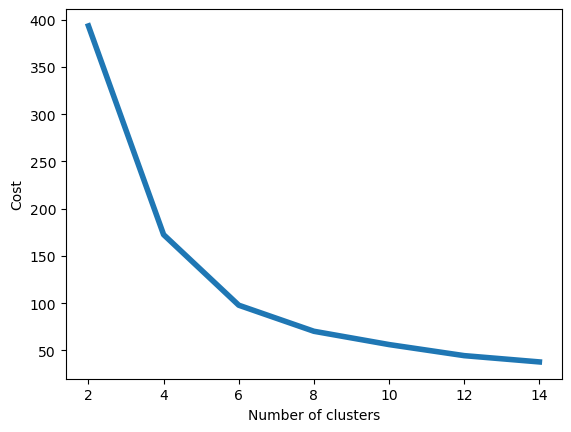

In [87]:
def elbow(data):
    sse = {}
    for k in range(2, 15, 2):
        kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
        print(k, kmeans.inertia_)
        sse[k] = kmeans.inertia_  
        # Inertia: Sum of distances of samples to their closest cluster center
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()), linewidth=4)
    plt.xlabel("Number of clusters")
    plt.ylabel("Cost")
    plt.show()
elbow(treated_data[['LAND SQUARE FEET', 'GROSS SQUARE FEET','lnprice']])